# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your farm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Importing necessary libraries and data

In [573]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# command let the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

#### Importing the dataset

In [574]:
df = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [575]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

#### Viewing the first, last and random 5 rows of the dataset for better understanding of dataset

In [576]:
# View the first 5 rows of the dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [577]:
# View the last five rows of the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [578]:
# view the random five rows of the dataset
data.sample(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7182,INN07183,2,1,0,4,Meal Plan 1,0,Room_Type 1,10,2018,2,10,Online,0,0,0,126.50000,2,Canceled
35758,INN35759,3,0,2,2,Meal Plan 1,0,Room_Type 4,71,2018,9,10,Online,0,0,0,168.30000,2,Not_Canceled
16794,INN16795,2,0,2,0,Not Selected,0,Room_Type 1,14,2018,9,11,Online,0,0,0,98.00000,3,Not_Canceled
5435,INN05436,2,0,1,0,Meal Plan 1,0,Room_Type 4,6,2018,8,21,Online,0,0,0,145.00000,2,Not_Canceled
19304,INN19305,2,1,0,2,Meal Plan 1,1,Room_Type 1,91,2018,8,3,Online,0,0,0,148.50000,1,Not_Canceled


<IPython.core.display.Javascript object>

#### Understanding the shape of the dataset.

In [579]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 36275 rows and 19 columns in the dataset.


<IPython.core.display.Javascript object>

#### Checking the duplicate data. And if any, then lets remove it.

In [580]:
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

**Observation:**
* There is no duplicates in the dataset.

#### Checking the data types of the columns for the dataset.

In [581]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

**Observations:**
* Out of `19 columns`,`13 columns` are `int type` and `1 column` is `float type` and `5 columns` are `object type.
* `5 columns` - `Booking_ID`,`type_of_meal_plan`,`room_type_reserved`,`market_segment_type` and  `booking_status` have `object data type`, this means we need to convert these into suitable data-type before we feed our data into the model.
* There are no missing values in the dataset.


#### Lets convert the columns with an 'object' datatype into categorical variables

In [582]:
# Looping through all columns in the dataframe
for feature in data.columns:
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer

<IPython.core.display.Javascript object>

In [583]:
# Checking the data types of the columns after conversion.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

**Observations:**
* All object data types converted to category.
* Memory usage also optimized from 5.3 + MB to 4.0 MB.
* since `Booking_ID` is the unique identifier which does not include any meaningful insight to the model building so it is dropped` from the dataset.

**Let's drop the Booking_ID column first before we proceed forward**.

In [584]:
data = data.drop(labels="Booking_ID", axis=1)

<IPython.core.display.Javascript object>

In [585]:
# Now let see the 5 random rows of the dataset after dropping "Booking_ID"
data.sample(n=5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4189,1,0,0,3,Meal Plan 1,0,Room_Type 1,15,2018,2,18,Offline,0,0,0,85.33000,0,Not_Canceled
35683,2,0,1,1,Meal Plan 1,0,Room_Type 1,275,2018,6,4,Offline,0,0,0,62.80000,0,Canceled
2218,2,0,2,2,Meal Plan 1,0,Room_Type 1,133,2018,5,29,Online,0,0,0,99.66000,2,Not_Canceled
25111,2,0,1,2,Not Selected,0,Room_Type 1,16,2018,6,17,Online,0,0,0,129.00000,0,Canceled
24043,2,0,2,4,Meal Plan 1,0,Room_Type 4,138,2018,8,13,Online,0,0,0,145.20000,1,Canceled


<IPython.core.display.Javascript object>

In [586]:
# Lets check the dataset after deleting "Booking_ID"
print(f"There are {data.shape[0]} rows and {data.shape[1]} after deleteing Booking_ID")

There are 36275 rows and 18 after deleteing Booking_ID


<IPython.core.display.Javascript object>

### Exploratory Data Analysis(EDA)

#### Let's check the statistical summary of the data.

In [587]:
# Checking statistical summary of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

**Observations:**
* 75% of customer bookings have 2 adult in their booking.
* 75% of bookings have no children which means they are couple.
* 75% of booking data shows that customer books for 2 days in weekend and 3 days in week days.
* Most data shows that customer do not required car parking.
* Most of the guests are new guest since mean value of repeated_guest near to 0, 0 means no and 1 means yes. 
* Booking and arrival time is varied from o to 443 days, on average customer books before 85 days before they arrive in hotel.
* Booking occurs from 2017 to 2018 and from the month january to december.
* Average price of the room is ~35 Euros.
* Number of special requests varies from 0 to 5. 75th percentile data shows there is only one special request.


In [588]:
# Checking statistical summary of the non-numerical data
data.describe(exclude=np.number)

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


<IPython.core.display.Javascript object>

In [589]:
# looking at value counts for non-numeric features
cat_columns = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

**Observations:**
* There are four types of meal plan out of which meal plan 1 is the most dominant.
* There are 7 types of room to reserve out of which Room_type 1 is the most dominant.
* There are five segment types where most dominant type is online.
* Booking_status shows that ~67 percent of the booking is not cancelled.

### Univariate Analysis

In [590]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

#### Observations on lead_time

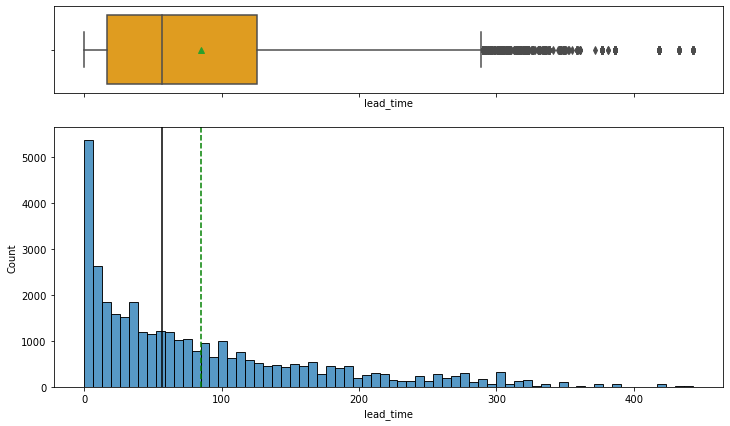

<IPython.core.display.Javascript object>

In [591]:
histogram_boxplot(data, "lead_time")

* The distribution of `lead_time` is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 126days which means 75% of customers book before 126 days of their arrival in the hotel.

#### Observations on avg_price_per_room

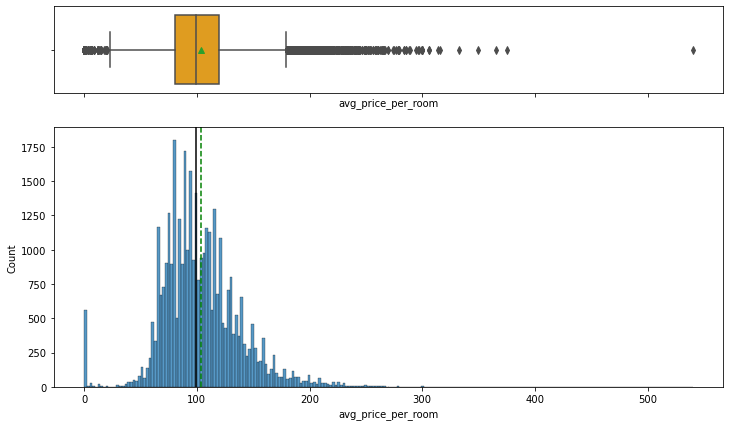

<IPython.core.display.Javascript object>

In [592]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution of `avg_price_per_room` is lightly right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 126days which means 75% of avg_price_per_room is 120 Euros.

#### Observations on no_of_previous_cancellations

In [593]:
data[data["no_of_previous_cancellations"] != 0]["no_of_previous_cancellations"]

145       3
155       1
302       1
328       1
392       3
         ..
35521     1
35716     2
35983     4
36079    11
36080     3
Name: no_of_previous_cancellations, Length: 338, dtype: int64

<IPython.core.display.Javascript object>

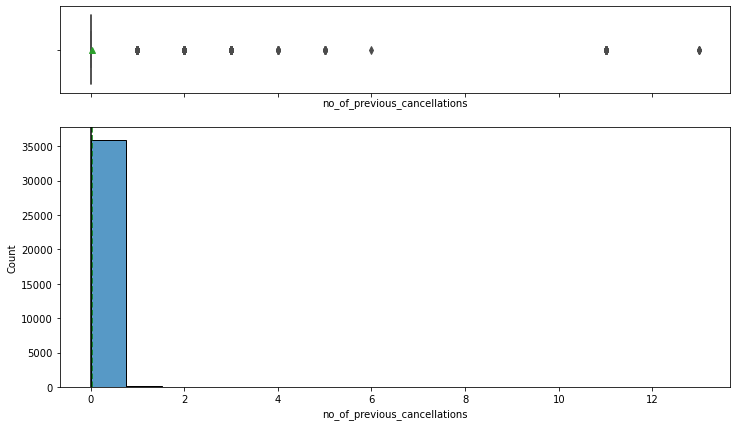

<IPython.core.display.Javascript object>

In [594]:
histogram_boxplot(data, "no_of_previous_cancellations")

* There are outliers in this variable.
* Most of the customers did not cancel their booking previously, only 338 out of 36275  have previously cancelled bookings prior to the current booking. 



#### Observations on no_of_previous_bookings_not_canceled

In [595]:
data[data["no_of_previous_bookings_not_canceled"] != 0][
    "no_of_previous_bookings_not_canceled"
]

88        5
145       5
155       5
266       1
288       3
         ..
35983    17
35999     8
36029     3
36080    15
36110     1
Name: no_of_previous_bookings_not_canceled, Length: 812, dtype: int64

<IPython.core.display.Javascript object>

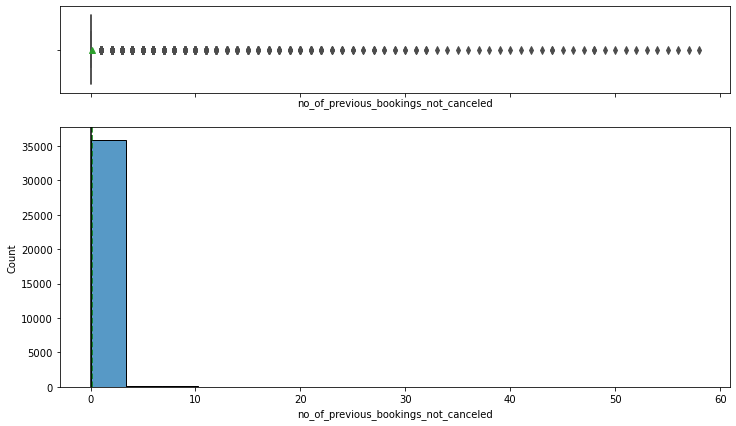

<IPython.core.display.Javascript object>

In [596]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* There are outliers in this variable.
* Few customers(812) out of 36275 did not cancel their booking prior to the current booking.



In [597]:
# creating User define function labeled_barplot() to create labeled barplots for objects/categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set3",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Observations on no_of_adults

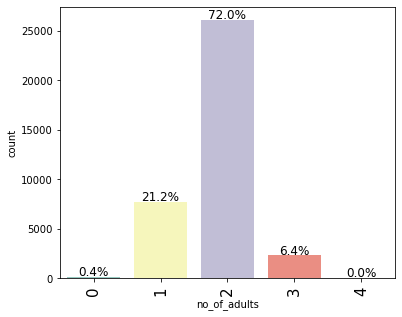

<IPython.core.display.Javascript object>

In [598]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'no_of_adults'
labeled_barplot(data, "no_of_adults", perc=True)

* `72%` of customer having 2 adults in their bookings followed by `21.2%` customer is having 1 adult in their booking.
*  There are few bookings where there is no adult which means customer did not put correct booking informaiton.

#### Observations on no_of_children

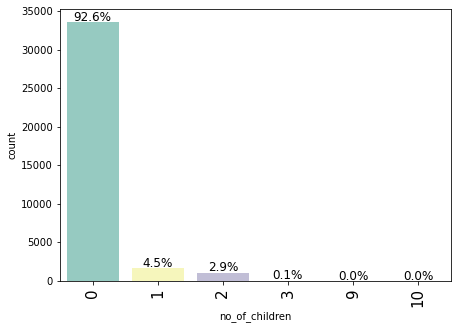

<IPython.core.display.Javascript object>

In [599]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'no_of_children'
labeled_barplot(data, "no_of_children", perc=True)

* `~93%` of customer bookings dont have children meaning they are couple.

#### Observations on no_of_week_nights

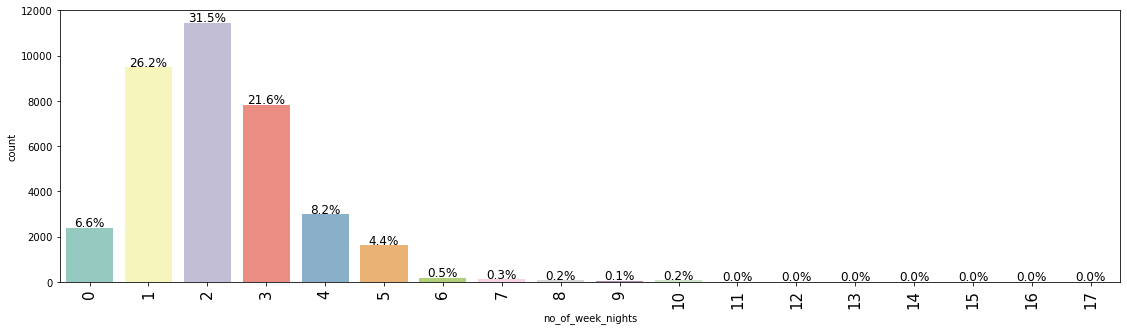

<IPython.core.display.Javascript object>

In [600]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'no_of_week_nights'
labeled_barplot(data, "no_of_week_nights", perc=True)

* `31.5%` of customer booking is having 2 days of week days night followed `26.2%` is having 1 day and `21.6%` is having 3 days in week days night.
* There were more than 5 days in week days booking meaning customer booked for two or more weeks.

#### Observations on no_of_weekend_nights

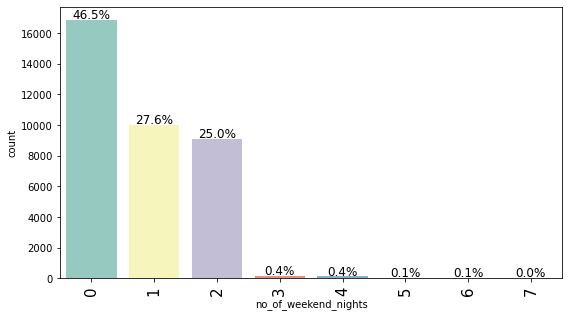

<IPython.core.display.Javascript object>

In [601]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'no_of_weekend_nights'
labeled_barplot(data, "no_of_weekend_nights", perc=True)

* `46.5%` of customer booking is having only day visiting and will not stay in overnight.
* `27.6%` of customer will stay one night and `25%` of customers will stay 2 nights.
* Few data shows that customer bookings have more than 3 weekend nights meaning customer booked for two or more weeks.

#### Observations on required_car_parking_space

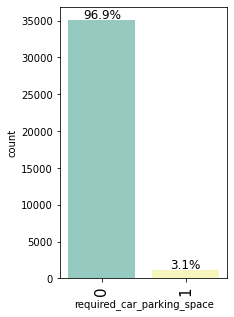

<IPython.core.display.Javascript object>

In [602]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column ' required_car_parking_space'
labeled_barplot(data, "required_car_parking_space", perc=True)

* `96.9%` of customer booking do not require car parking space.

#### Observations on type_of_meal_plan

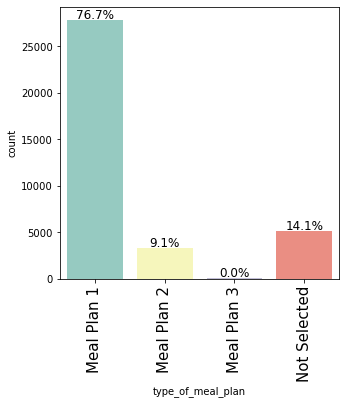

<IPython.core.display.Javascript object>

In [603]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'type_of_meal_plan'
labeled_barplot(data, "type_of_meal_plan", perc=True)

* `76.7%` of customer booking have chosen `Meal Plan 1` follwed by `14.1%`selected `Not selected meal plan` and 9.1% Selected `Meal Plan 2`.

#### Observations on room_type_reserved

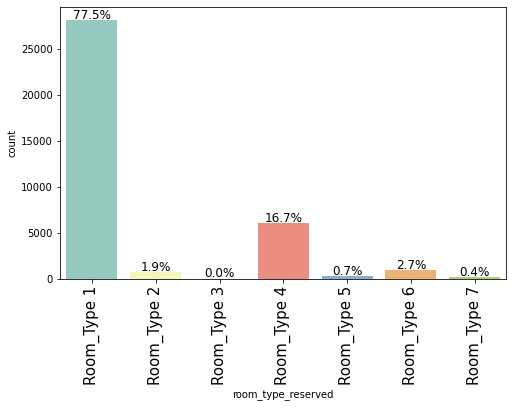

<IPython.core.display.Javascript object>

In [604]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'room_type_reserved'
labeled_barplot(data, "room_type_reserved", perc=True)

* `77.5%` of customer booking have chosen `Room_Type 1` followed by `16.7%` have chosen  `Room_Type 4`.

#### Observations on arrival_month

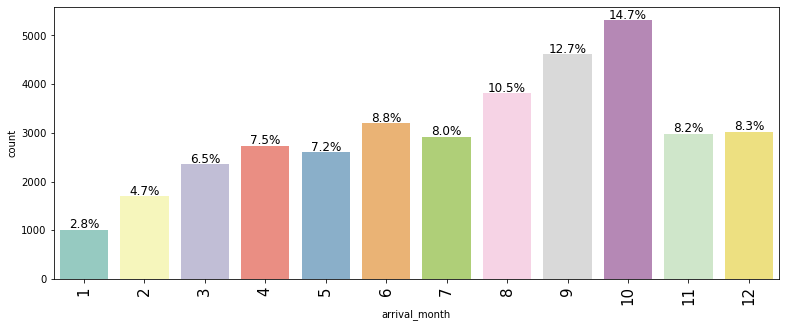

<IPython.core.display.Javascript object>

In [605]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'arrival_month'
labeled_barplot(data, "arrival_month", perc=True)

* Busiest months of the hotel are Aug,Sep and Oct,where Oct is the most busiest month.


#### Observations on arrival_year

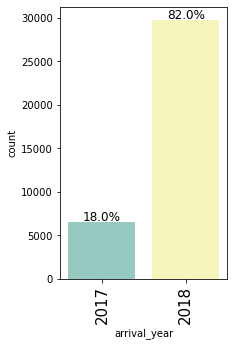

<IPython.core.display.Javascript object>

In [606]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'arrival_year'
labeled_barplot(data, "arrival_year", perc=True)

* `82%` of customer bookings data came from `2018`.

#### Observations on arrival_date

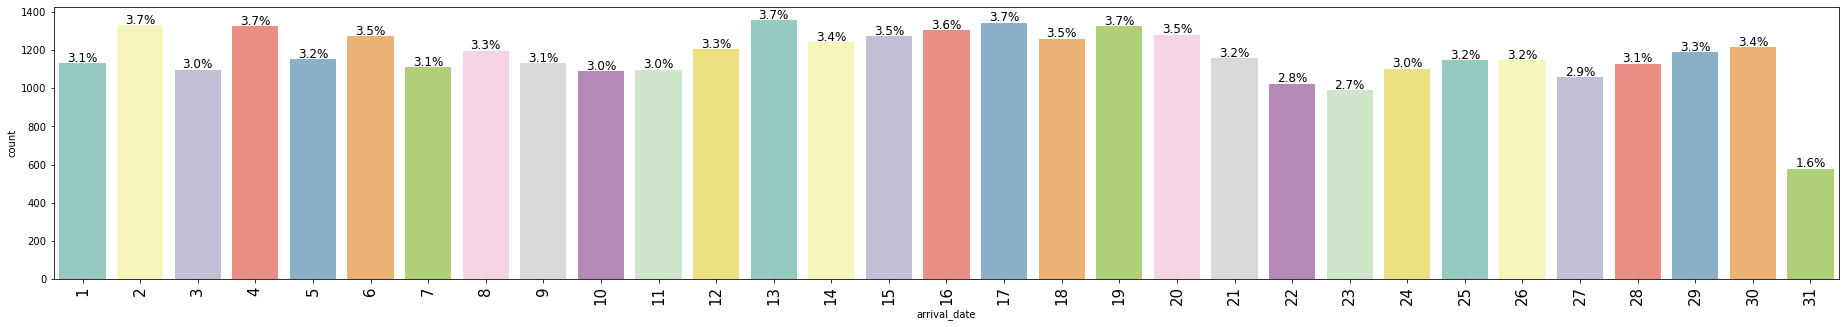

<IPython.core.display.Javascript object>

In [607]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'arrival_date'
labeled_barplot(data, "arrival_date", perc=True)

* Guests are coming evenly throughout the month.

#### Observations on market_segment_type

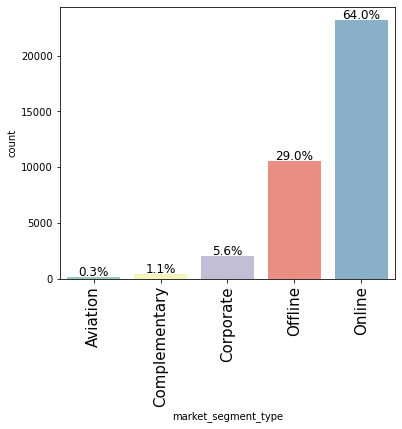

<IPython.core.display.Javascript object>

In [608]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'market_segment_type'
labeled_barplot(data, "market_segment_type", perc=True)

* `64%` of the guest come from `Online` market segment followed by `29%` of the guests come from `Offline` market segment.


#### Observations on no_of_special_requests

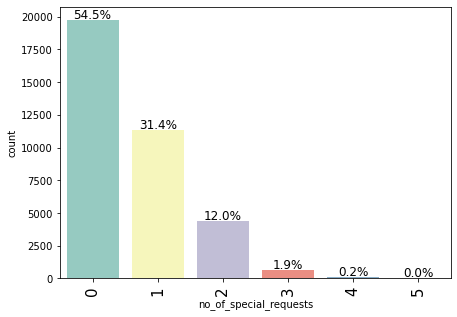

<IPython.core.display.Javascript object>

In [609]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'no_of_special_requests'
labeled_barplot(data, "no_of_special_requests", perc=True)

* `54.5%` of customer booking `do not have` special request followed by `31.4%` booking have `1` special request.

#### Observations on repeated_guest

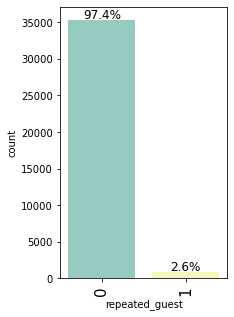

<IPython.core.display.Javascript object>

In [610]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'booking_status'
labeled_barplot(data, "repeated_guest", perc=True)

* Only `2.6%` customer bookings are from repeated guest.

#### Observations on booking status

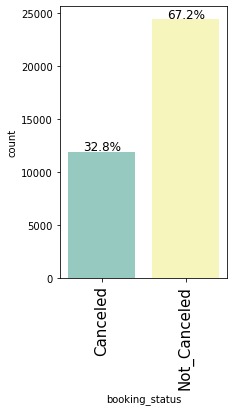

<IPython.core.display.Javascript object>

In [611]:
# By using user defined function labeled_barplot(), we will create labeled barplot for object column 'booking_status'
labeled_barplot(data, "booking_status", perc=True)

* `67.2%` of customer booking status is not cancelled where`32.8%` booking status is cancelled.


**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [612]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

In [613]:
# Lets see the data after encoding canceled booking to 1 and Not_canceled as 0
data.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


<IPython.core.display.Javascript object>

In [614]:
# Now lets check again the data types of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

In [615]:
# Lets convert the data types of booking_status from category to int for further Bivariate analysis
data["booking_status"] = data["booking_status"].astype(np.int64)
# Lets check the data types after conversion of booking_status
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

### Bivariate Analysis

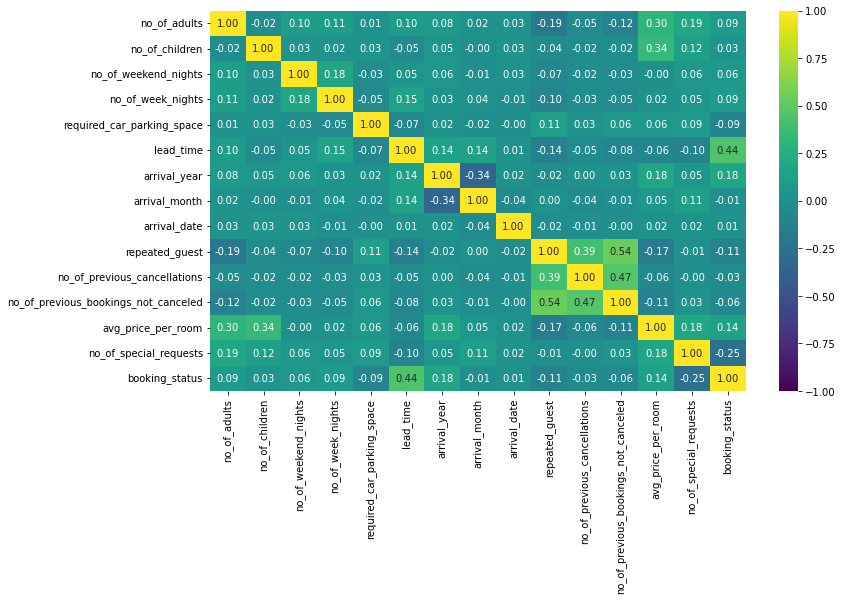

<IPython.core.display.Javascript object>

In [616]:
# creating cols_list that contain columns of numerical data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis"
)
plt.show()

**Observations:**
* `booking_status` is moderately correlated with `lead_time`.
* `Overall numerical data` is not highly correlated.
* `no_of_adults` and `avg_price_per_room` is moderately correlated.
* `no_of_children` and `avg_price_per_room` is moderately correlated.
* `no_of_previous_bookings_not_canceled` and `repeated_guest` are moderately correlated.
* `no_of_previous_bookings_not_canceled` and `no_of_previous_cancellations` are moderately correlated.


**Creating functions that will help us with further analysis.**

In [617]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [618]:
# Function to plot stacked_barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

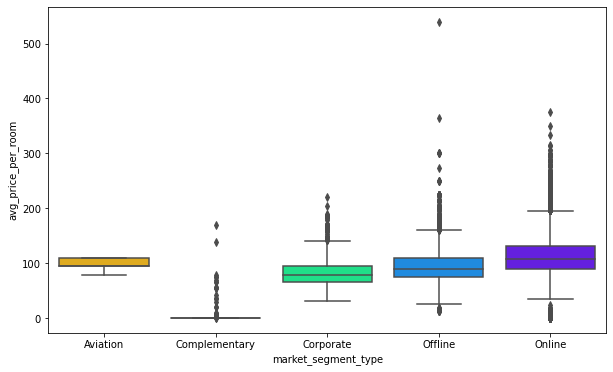

<IPython.core.display.Javascript object>

In [619]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
* `Average room price` is highest in `online` market segment followed by `aviation` and `offline`.
*  `Average price per room` in `Online` market segment is `above 100 Euros`.
* On Average,`Offline and corporate` market segment price is `below 90 Euro`, whereas `complementary` price varies from `0 Euros to above 100 Euros` depending upon demand.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


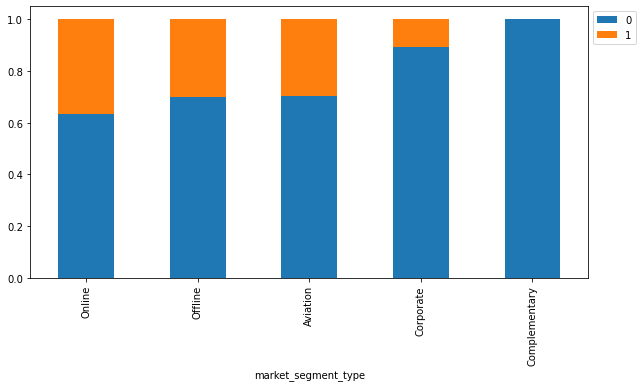

<IPython.core.display.Javascript object>

In [620]:
stacked_barplot(data, "market_segment_type", "booking_status")

**Observations:**
* Majority of cancelled bookings belongs to online market segment.
* `36.5%` online bookings were cancelled by customer followed by offline `~30%`, aviation `~30%` and corporate `~10%`.
* No complementary booking was cancelled. so it is certain that if a customer booking belongs to complementary then customer is showing up in the hotel.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


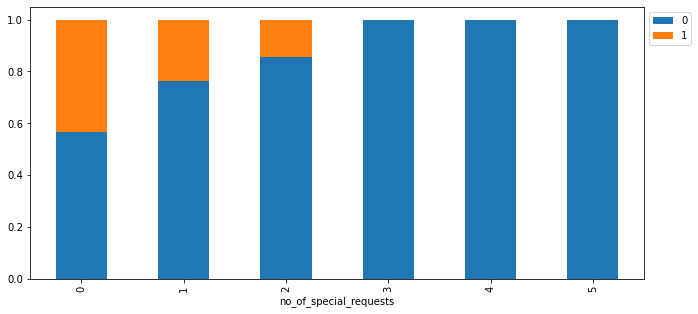

<IPython.core.display.Javascript object>

In [621]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

**Observations:**
* If the number of special requests is more than 2 than it is certain that booking will not be canceled.
* More than `40%` booking were canceled since there was no special requests.On the other hand only `20%` bookings were canceled if there was one special request and `~10%` booking were canceled if there was two special request.


**Let's see if the special requests made by the customers impacts the prices of a room**

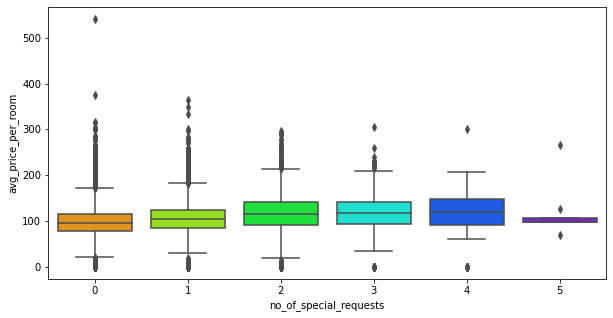

<IPython.core.display.Javascript object>

In [622]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    palette="gist_rainbow",
)
plt.show()

* If the number of special requests is more than 1 than then average price of the room is more than 100 Euros.
* If there is no special requests then average price of the room is 100 Euros.
* Number of special requests increase the average room price.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

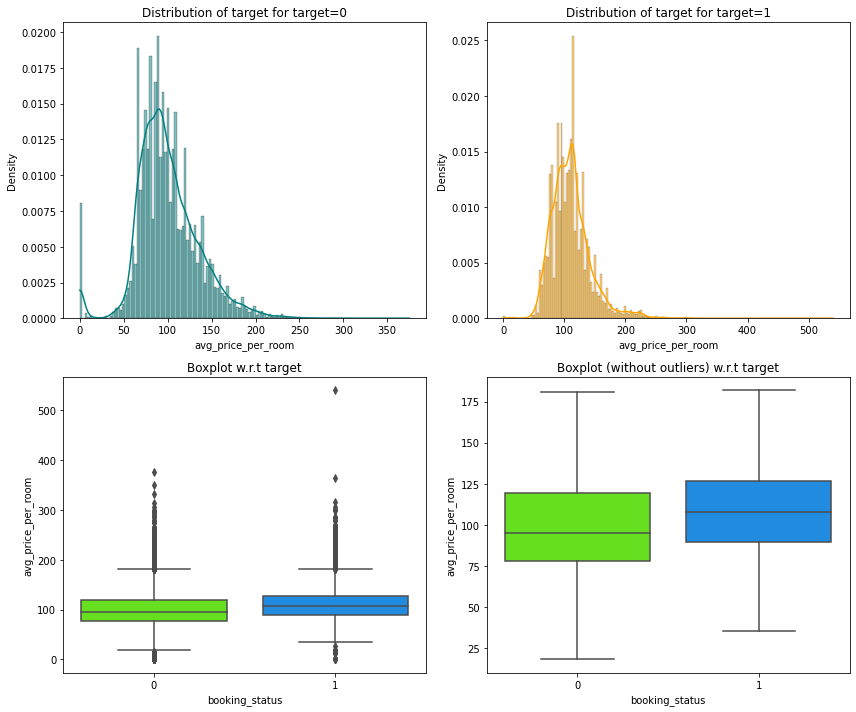

<IPython.core.display.Javascript object>

In [623]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

**Observation:**
* If the average price of the room is below 100 Euros then booking will not be cancelled.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

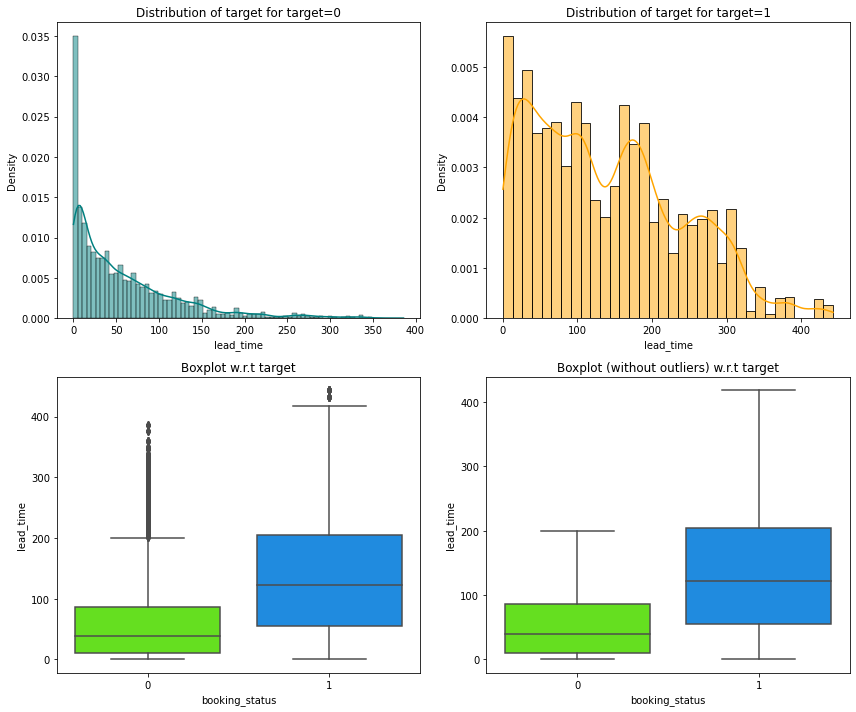

<IPython.core.display.Javascript object>

In [624]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

**Observation:**
* If the lead time is within 100 days then booking will not be cancelled otherwise it will mostly be cancelled.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [625]:
# family data is no_of_adults greater than 1
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
print(
    f"There are {family_data.shape[0]} rows and {family_data.shape[1]} columns where no_of_adults > 1 "
)

There are 28441 rows and 18 columns where no_of_adults > 1 


<IPython.core.display.Javascript object>

In [626]:
# Combining number of adults and number of children to find number of family members
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


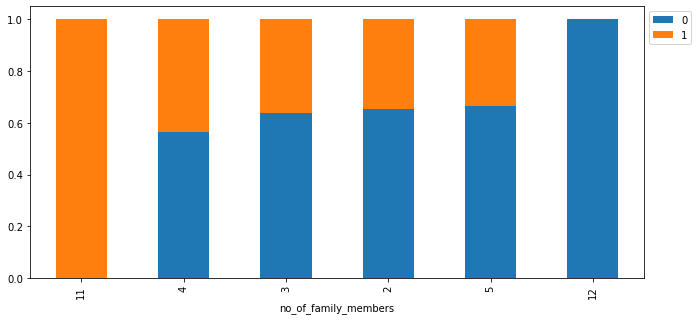

<IPython.core.display.Javascript object>

In [627]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

**Observations:**
* If the family members(adults + children) is more than 11 then booking will be cancelled.
* If the family members(adults + children) is 2 then almost `~35%` booking will be cancelled.
* If the family members(adults + children) is 4 then almost `~45%` booking will be cancelled.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [628]:
# customer who stay at least one day in week days or week nights
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [629]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

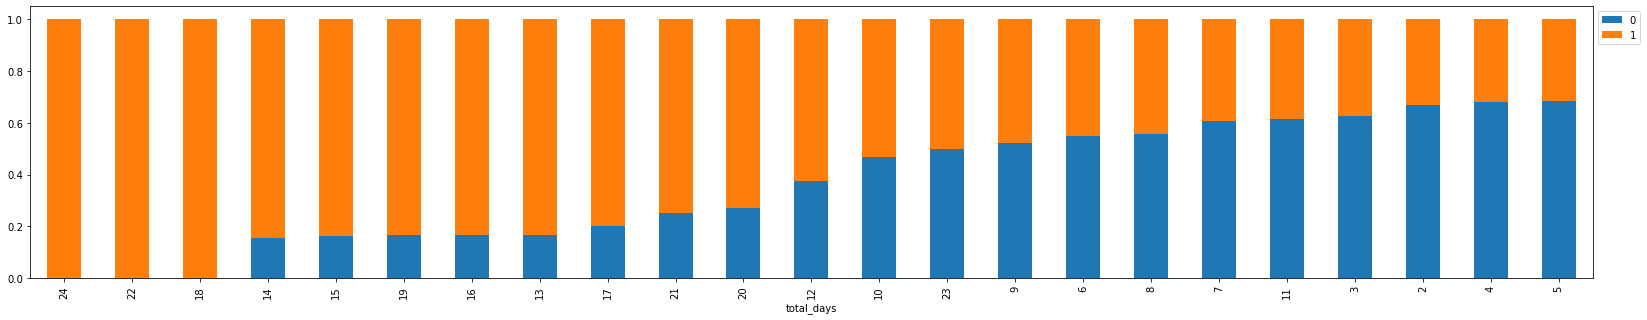

<IPython.core.display.Javascript object>

In [630]:
stacked_barplot(stay_data, "total_days", "booking_status")

**Observations:**
* If the total days(weekend + week days) is 18,22 and 24 days then  then all booking will be cancelled.
* If the total days(weekend + week days) is between 2 to 5 days then less number of booking will be cancelled.
* If the total days(weekend + week days) are more than 10 then the chance of cancellation is more than `65%`

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel their bookings**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


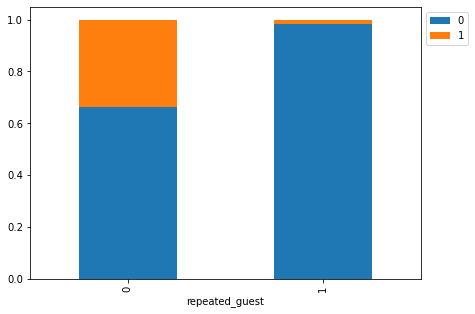

<IPython.core.display.Javascript object>

In [631]:
stacked_barplot(data, "repeated_guest", "booking_status")

**Observations:**
* Very few repeated guest(`1.7%`) cancel their booking.so, it is certain that repeated guest will not cancel their bookings.

**Let's find out what are the busiest months in the hotel.**

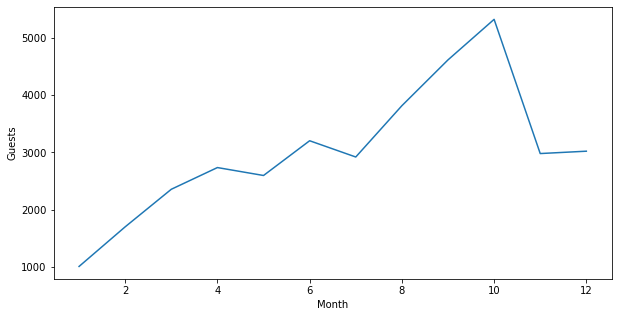

<IPython.core.display.Javascript object>

In [632]:
# grouping the data on arrival months and extracting the number of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Observations:**
* October is the most busiest month of the year.
* Customer booking increase from jul to Oct where guests are typically 3000 to 5000.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


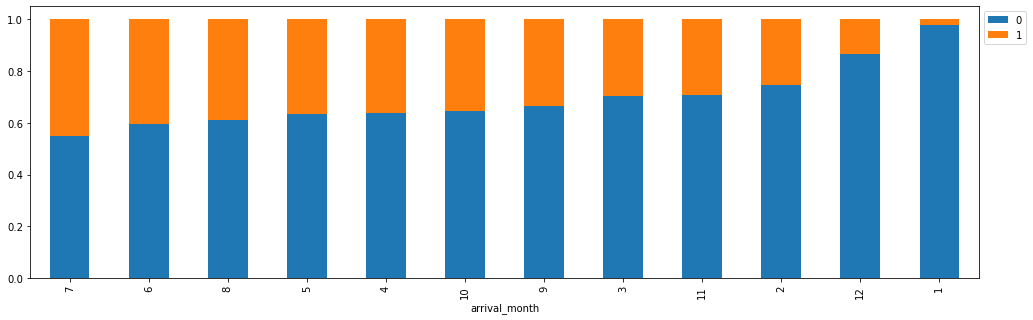

<IPython.core.display.Javascript object>

In [633]:
stacked_barplot(data, "arrival_month", "booking_status")

**Observations:**
* Most of the bookings cancel from Jul to Oct.
* Most bookings is cancelled on Jul followed by jun and Aug.
* Less bookings are cancelled in Jan.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

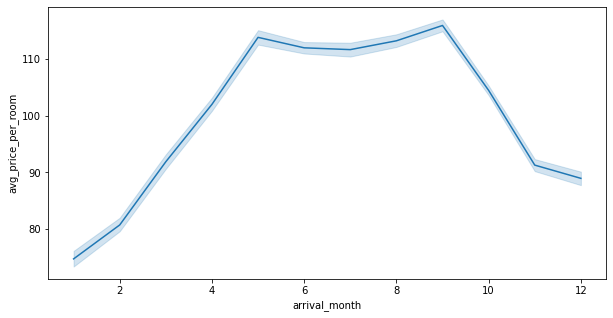

<IPython.core.display.Javascript object>

In [634]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data, x="arrival_month", y="avg_price_per_room"
)  ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

**Observations:**
* Average price per room is highest from may to sep.
* Average price of the room is lowest in the month of Jan and it started increasing from feb to May.Again it started decreasing from sep to Dec.

### Summary of EDA
**Data Description:**

* There are 36275 rows and 19 columns in the dataset.
* Out of `19 columns`,`13 columns are int` type and `1 column is float` type and `5 columns are object` type.
* 5 columns - `Booking_ID`,`type_of_meal_plan`,`room_type_reserved`,`market_segment_type` and  `booking_status` are having data-types as an `object`, this means we need to convert these into suitable data-type before we feed our data into the model.
* There are no missing values in the dataset.
* There is no duplicate values in the dataset.

**Data Preprocessing:**

* since `Booking_ID` is the unique identifier which does not include any meaningful insight to the model building so it is dropped` from the dataset.
* All object data types converted to category for model building.
* booking_status is the dependent variable. so for further analysis, booking_status was encoded as `Canceled bookings to 1` and `Not_Canceled as 0` for further analysis.

**Observations from EDA:**

* `arrival_month`: Busiest months of the hotel are Aug,Sep and Oct,where Oct is the most busiest month.
* `market_segment_type`:`64%` of the guest come from `Online` market segment followed by `29%` of the guests from `Offline`.
* `booking_status`:`67.2%` of customer booking status is not cancelled where`32.8%` booking status is cancelled.
* `market_segment_type`:`64%` of the guest come from `Online` market segment followed by `29%` of the guests come from `Offline` market segment.
* `repeated_guest`:* Only `2.6%` customer bookings are from repeated guest.
* `no_of_special_requests`: 
* `no_of_adults`:`72%` of customer having 2 adults in their bookings followed by `21.2%` customer is having 1 adult in their booking.There are few bookings where there is no adult which means customer did not put correct booking informaiton.
* `no_of_children`: `~93%` of customer bookings dont have children meaning they are couple.
* `no_of_week_nights`: `31.5%` of customer booking is having 2 days of week days night followed `26.2%` is having 1 day and `21.6%` is having 3 days in week days night.There were more than 5 days in week days booking meaning customer booked for two or more weeks.
* `no_of_weekend_nights`:`46.5%` of customer booking is having only day visiting and will not stay in overnight.`27.6%` of customer will stay one night and `25%` of customers will stay 2 nights.Few data shows that customer bookings have more than 3 weekend nights meaning customer booked for two or more weeks.
* `car_parking_space`:`96.9%` of customer booking do not require car parking space.
* `type_of_meal_plan`: `76.7%` of customer booking have chosen `Meal Plan 1` follwed by `14.1%`selected `Not selected meal plan` and 9.1% Selected `Meal Plan 2`.
* `room_type_reserved`: `77.5%` of customer booking have chosen `Room_Type 1` followed by `16.7%` have chosen  `Room_Type 4`.
* `arrival_month`: Busiest months of the hotel are Aug,Sep and Oct,where Oct is the most busiest month.
* `market_segment_type vs booking_status`: Majority of cancelled bookings belongs to online market segment.`36.5%` online bookings were cancelled by customer, followed by offline `~30%`, aviation `~30%` and corporate `~10%`.No complementary booking was cancelled. so it is certain that if a customer booking belongs to complementary then customer is showing up in the hotel.
* `no_of_special_requests vs booking_status`: If the number of special requests is more than 2 than it is certain that booking will not be canceled.
* `market_segment_type vs avg_price_per_room`:`Average room price` is highest in `online` market segment followed by `aviation` and `offline`.
* `no_of_special_requests vs avg_price_per_room`:  Number of special requests increase the average room price.
* `avg_price_per_room vs booking_status`: If the average price of the room is below 100 Euros then booking will not be cancelled.
* `booking_status vs lead_time`: If the lead time is within 100 days then booking will not be cancelled otherwise it will mostly be cancelled.
* `booking_status vs Family_members`: If the family members(adults + children) is more than 11 then booking will be cancelled.
* `booking_status vs total days`:If the total days(weekend + week days) is 18,22 and 24 days then  then all booking will be cancelled.If the total days(weekend + week days) is between 2 to 5 days then less number of booking will be cancelled.on the other hand,If the total days(weekend + week days) are more than 10 then the chance of cancellation is more than `65%`
* `arrival_month vs booking_status`: Most bookings cancel from Jul to Oct where in jul it is the top most.

### Data Preprocessing
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

#### Outlier detection using boxplot

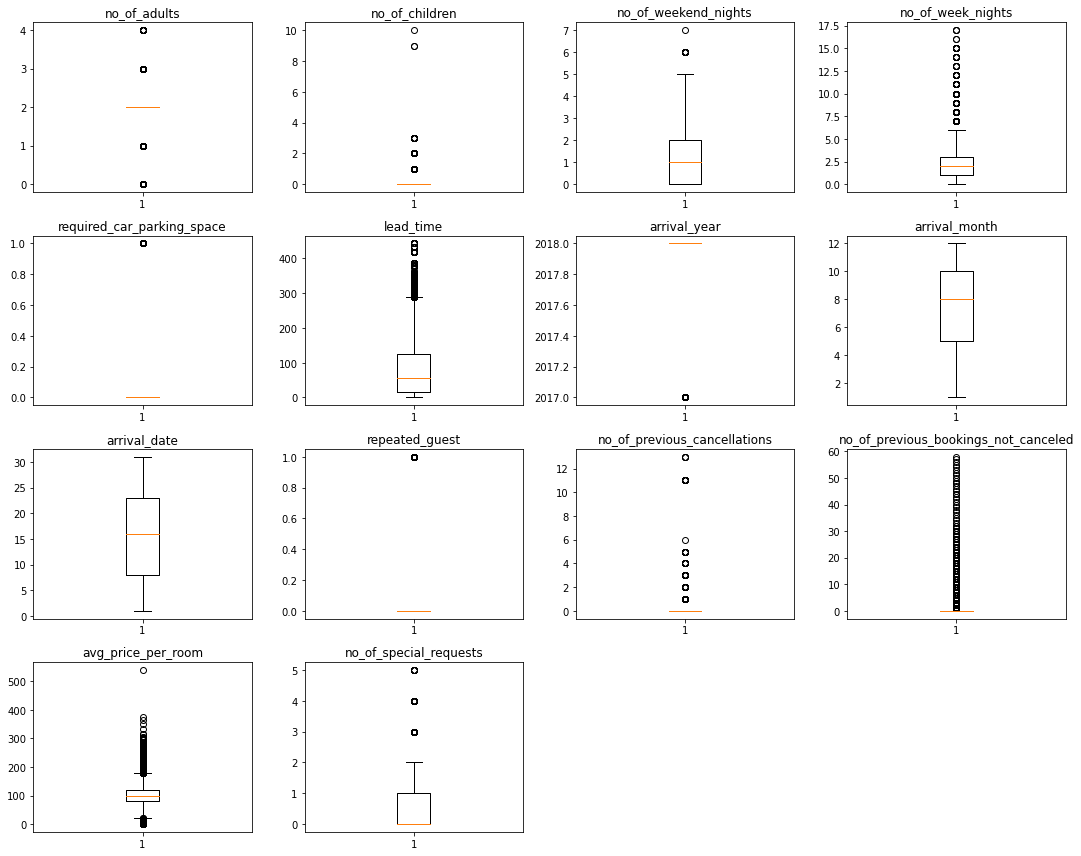

<IPython.core.display.Javascript object>

In [635]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status as it is a target variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* `avg_price_per_room` and `no_of_week_nights` and `lead_time` do have outliers in them.
* We will treat these outliers by flooring and capping, i.e., we will replace the
    * lower outliers by Q1 - 1.5IQR.
    * upper outliers by Q3 + 1.5IQR.

#### Treating Outliers

In [636]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [637]:
# treat_out_cols define the columns having outlier
treat_out_cols = ["avg_price_per_room", "no_of_week_nights", "lead_time"]
# we are treating treat_out_cols by flooring and capping
data = treat_outliers_all(data, treat_out_cols)

<IPython.core.display.Javascript object>

**Let's recheck the boxplots to see if outliers were treated.**

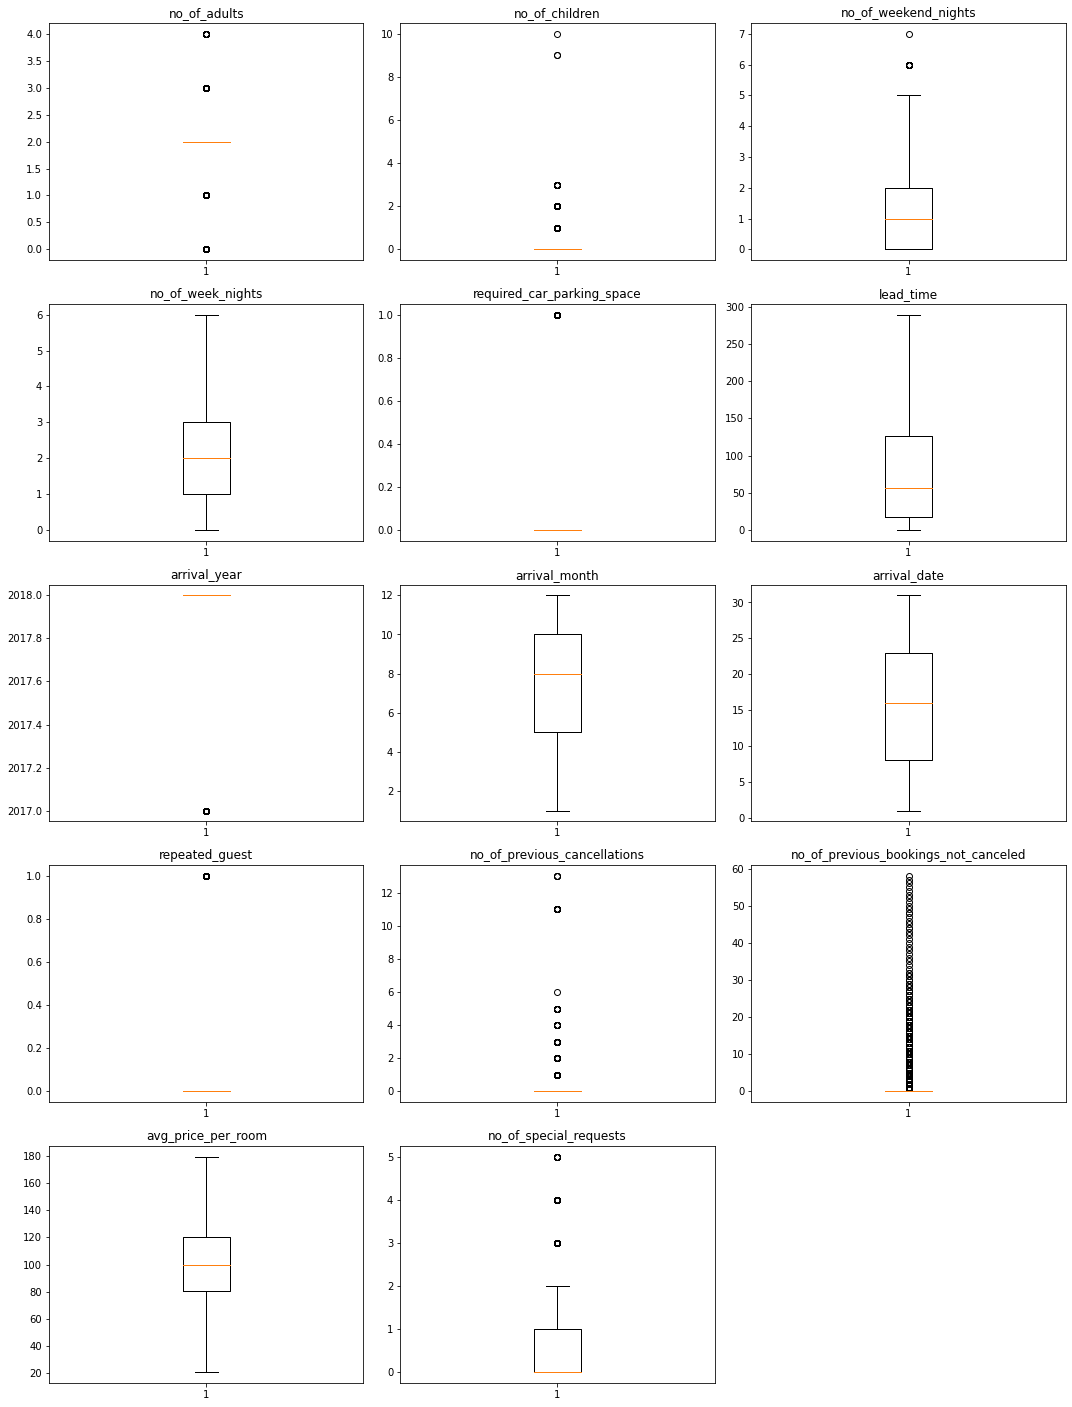

<IPython.core.display.Javascript object>

In [638]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* `avg_price_per_room`, `no_of_week_nights`, and  `lead_time` columns have corrtecly treated.

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data

In [639]:
# We are defining dependent and independent variables, here X is independent and Y is dependent variable which is booking_status
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

# creating dummies for X
X = pd.get_dummies(X, drop_first=True)

# spliting the data into train test in the ratio 70:30 with random_state = 1(with random_state, i define every time i take same sample for understanding the performance of model)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

* The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.

### Building the model

#### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



#### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [640]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [641]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [642]:
# we have already created independent X and dependent Y variable, lets see top five rows of train data
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
6870,1.00000,2,0,2,3.00000,0,5.00000,2018,12,30,0,0,0,116.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,1
531,1.00000,2,1,0,3.00000,0,86.00000,2018,12,8,0,0,0,122.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3394,1.00000,1,0,0,3.00000,0,105.00000,2018,5,5,0,0,0,117.30000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23540,1.00000,1,0,1,1.00000,0,85.00000,2018,12,3,0,0,0,98.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15302,1.00000,2,0,1,2.00000,0,289.50000,2018,5,13,0,0,0,101.00000,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [643]:
# Top five rows of the test data
X_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
22801,1.00000,2,0,0,1.00000,0,0.00000,2018,8,25,0,0,0,92.98000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3830,1.00000,2,0,0,3.00000,0,80.00000,2018,11,10,0,0,0,120.90000,2,0,0,0,0,0,0,0,0,0,0,0,0,1
33959,1.00000,2,0,1,3.00000,0,23.00000,2017,9,14,0,0,0,105.00000,2,0,0,0,0,0,0,0,0,0,0,0,0,1
14068,1.00000,3,0,0,2.00000,0,21.00000,2018,6,1,0,0,0,157.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10215,1.00000,3,0,2,1.00000,0,13.00000,2018,2,6,0,0,0,130.00000,2,0,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [644]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.422322
         Iterations: 35


<IPython.core.display.Javascript object>

In [645]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3323
Time:                        21:05:16   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -951.8588    121.602     -7.828      0.000   -1190.194    -713.523
no_of_adults                             0.0336      

<IPython.core.display.Javascript object>

**Let's check the performance of the Model on training**

In [646]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80655,0.63445,0.73829,0.68244


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer booking cancellation decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer booking cancellation increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.


#### But to make interpretations from the model, first we will have to remove multicollinearity from the data to get reliable coefficients and p-values. 
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

#### Test for Multicollinearity
* We will test for multicollinearity using VIF


**Ways to Check Multicolinearity:**
* we will check Multicollinearity using VIF.
* General Rule of Thumb:
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [647]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [648]:
# Checking VIF on train data to see if there is any multi-colinearity amongst dependent variables
checking_vif(X_train)

,feature,VIF
0,const,39509396.93896
1,no_of_adults,1.34875
2,no_of_children,2.00276
3,no_of_weekend_nights,1.05278
4,no_of_week_nights,1.09506
5,required_car_parking_space,1.03493
6,lead_time,1.39773
7,arrival_year,1.43019
8,arrival_month,1.27661
9,arrival_date,1.00751


<IPython.core.display.Javascript object>

**Observations:**
* Features having VIF greater than are:
     * `market_segment_type_Corporate`,`market_segment_type_Offline`,`market_segment_type_Online`
* we will drop feature one by one that makes least changes in training performance untill we find all VIF < 5

#### Removing market_segment_type_Online

In [649]:
X_train = X_train.drop("market_segment_type_Online", axis=1)

<IPython.core.display.Javascript object>

In [650]:
# Checking VIF on train data after dropping market_segment_type_Online
checking_vif(X_train)

,feature,VIF
0,const,39421608.61894
1,no_of_adults,1.33267
2,no_of_children,2.00189
3,no_of_weekend_nights,1.05231
4,no_of_week_nights,1.09493
5,required_car_parking_space,1.03485
6,lead_time,1.39317
7,arrival_year,1.42736
8,arrival_month,1.27543
9,arrival_date,1.00749


<IPython.core.display.Javascript object>

* Dropping dropping market_segment_type_Online fixes the multicollinearity in `market_segment_type_Corporate` and `market_segment_type_Offline`.

In [651]:
# Now Lets fit and check the performance of the model after treating multicollinearity
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

         Current function value: 0.422324
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.80647,0.63445,0.73808,0.68235


<IPython.core.display.Javascript object>

* Model performance slightly increased after fixing Multicolinearity.

#### Removing insignificant variables (p-value > 0.05 )

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [652]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [653]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

<IPython.core.display.Javascript object>

In [654]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3311
Time:                        21:05:18   Log-Likelihood:                -10743.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -936.8259    121.181     -7.731      0.000   -1174.336    -699.316
no_of_weekend_nights               0.1577      0.019      8.101      0.

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train* as the final ones and *lg* as final model.**

In [655]:
# Now Lets check the performance of the model after treating p-value
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80659,0.63409,0.73859,0.68236


<IPython.core.display.Javascript object>

* Model performance remain almost same after treating p-value.

#### Coefficient interpretations

* Coefficient of all the variables are positive and negative.
* Negative values of the coefficient shows that probability of customer booking cancellation decreases with the increase of corresponding attribute value.
* Positive values of the coefficient show that that probability of customer booking cancellation increases with the increase of corresponding attribute value.
* Coefficient of some levels of `no_of_weekend_nights`, `lead_time`,`arrival_year`,`no_of_previous_cancellations`,`avg_price_per_room`,`type_of_meal_plan_Meal Plan 2`, and `type_of_meal_plan_Not Selected` are `positive` an increase in these will lead to increase in chances of a booking cancellation. 
* Coefficient of `required_car_parking_space`,`arrival_month`,`repeated_guest`, `no_of_special_requests` ,`room_type_reserved_Room_Type 2` , `room_type_reserved_Room_Type 4`,`room_type_reserved_Room_Type 5`,`room_type_reserved_Room_Type 6`,`room_type_reserved_Room_Type 7`,`market_segment_type_Corporate` and `market_segment_type_Offline` are `negative` an increase in these will lead to decrease in chances of a of a booking cancellation.

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [656]:
# converting coefficients to odds
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,const,no_of_weekend_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.17082,0.19332,1.01669,1.58866,0.95377,0.05757,1.31098,1.02033,0.22585,1.27718,1.24439,0.70727,0.75904,0.51223,0.62824,0.48324,0.42677,0.17118
Change_odd%,-100.00000,17.08154,-80.66807,1.66927,58.86557,-4.62284,-94.24295,31.09753,2.03340,-77.41514,27.71776,24.43882,-29.27338,-24.09552,-48.77689,-37.17592,-51.67597,-57.32282,-82.88165


<IPython.core.display.Javascript object>

#### Coefficient interpretations

* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a guest booking cancellation by 1.17 times or a 17.08% increase in odds of a guest booking cancellation.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in the required_car_parking_space will decrease the odds of a a guest booking cancellation by  0.19 times or a decrease of 80.66% decrease in odds of a guest booking cancellation.
* `lead_time`: Holding all other features constant a 1 unit change in the lead_time will increase the odds of a a guest booking cancellation by 0.19 times or a increase of 1.66% in odds of a guest booking cancellation.
* `arrival_year`: Holding all other features constant a 1 unit change in the arrival_year will increase the odds of a a guest booking cancellation by 1.58866 times or a increase of 58.86% in odds of a guest booking cancellation.
* `arrival_month`: Holding all other features constant a 1 unit change in the arrival_month will decrease the odds of a a guest booking cancellation by  0.95377 times or a decrease of 4.62% decrease in odds of a guest booking cancellation.
* The odds of a guest booking who are `repeated_guest` having a booking cancellation chance is `0.057` less or `94.24% decrease` than the guest who never visited the hotel.
* `no_of_previous_cancellations`: Holding all other features constant a 1 unit change in the avg_price_per_room will increase the odds of a a guest booking cancellation by 1.31 times or a increase of 31.09% in odds of a guest booking cancellation.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the lead_time will increase the odds of a a guest booking cancellation by 1.02 times or a increase of 2.03% in odds of a guest booking cancellation.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number_of_special_requests will decrease the odds of a a guest booking cancellation by  0.22582 times or a decrease of 77.41% decrease in odds of a guest booking cancellation.
* `type_of_meal_plan_Meal Plan 2`: Holding all other features constant a 1 unit change in the type_of_meal_plan_Meal Plan 2 will increase the odds of a a guest booking cancellation by 1.27718 times or a increase of 27.72% in odds of a guest booking cancellation.
* `type_of_meal_plan_Not Selected`: Holding all other features constant a 1 unit change in the type_of_meal_plan_Not Selected will increase the odds of a a guest booking cancellation by 1.27718 times or a increase of 27.72% in odds of a guest booking cancellation.
* `room_type_reserved_Room_Type 2`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 2 will decrease the odds of a a guest booking cancellation by  0.7072 times or a decrease of 29.27% decrease in odds of a guest booking cancellation.
* `room_type_reserved_Room_Type 4`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 4 will decrease the odds of a a guest booking cancellation by  0.75 times or a decrease of 24.09% decrease in odds of a guest booking cancellation.
* `room_type_reserved_Room_Type 5`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 5 will decrease the odds of a a guest booking cancellation by  0.51 times or a decrease of 48.77% decrease in odds of a guest booking cancellation.
* `room_type_reserved_Room_Type 6`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 6 will decrease the odds of a a guest booking cancellation by  0.63 times or a decrease of 31.17% decrease in odds of a guest booking cancellation.
* `room_type_reserved_Room_Type 7`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 7 will decrease the odds of a a guest booking cancellation by  0.48 times or a decrease of 51.67% decrease in odds of a guest booking cancellation.
* `market_segment_type_Corporate`: Holding all other features constant a 1 unit change in the market_segment_type_Corporate will decrease the odds of a a guest booking cancellation by  0.42 times or a decrease of 57.32% decrease in odds of a guest booking cancellation.
* `market_segment_type_Corporate`: Holding all other features constant a 1 unit change in the market_segment_type_Corporate will decrease the odds of a a guest booking cancellation by  0.42 times or a decrease of 57.32% decrease in odds of a guest booking cancellation.
* `market_segment_type_Offline`: Holding all other features constant a 1 unit change in the market_segment_type_Offline will decrease the odds of a a guest booking cancellation by  0.17 times or a decrease of 82.88% decrease in odds of a guest booking cancellation.


#### Checking model performance on the training set

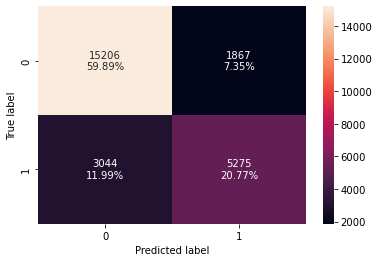

<IPython.core.display.Javascript object>

In [657]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

In [658]:
# Now Lets check the performance of the model
log_reg_model_train_perf = model_performance_classification_statsmodels(lg, X_train, y_train)
print("Training performance:")
log_reg_model_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.80659,0.63409,0.73859,0.68236


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

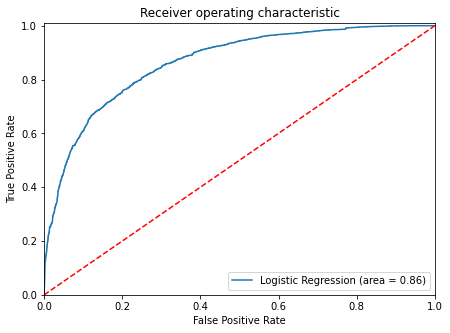

<IPython.core.display.Javascript object>

In [659]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

#### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [660]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3379946508984188


<IPython.core.display.Javascript object>

#### Checking model performance on training set

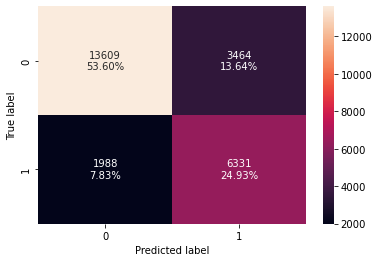

<IPython.core.display.Javascript object>

In [661]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [662]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78529,0.76103,0.64635,0.69902


<IPython.core.display.Javascript object>

* Precision and Accuracy of the model has decreased but the recall and F1 score has increased.
* The model is still giving a improved performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

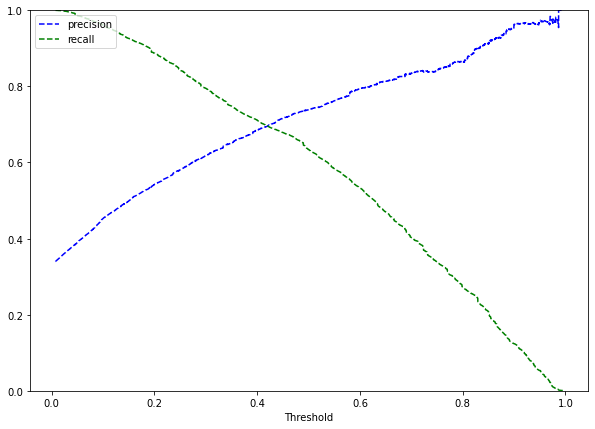

<IPython.core.display.Javascript object>

In [663]:
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [664]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

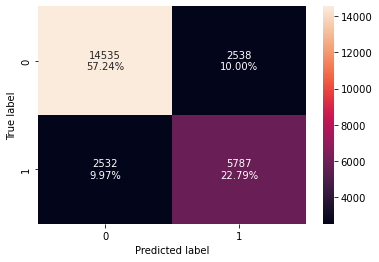

<IPython.core.display.Javascript object>

In [665]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=optimal_threshold_curve)

In [666]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80033,0.69564,0.69514,0.69539


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's no improvement in the model performance as the default threshold is 0.50 and here we get 0.33799 optimal threshold using AUC-ROC and 0.42 as the optimal threshold using Precision-Recall curve.

#### Let's check the performance on the test set

* Dropping the columns from the test set that were dropped from the training set

In [667]:
X_test = X_test[list(X_train.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold 0.50**

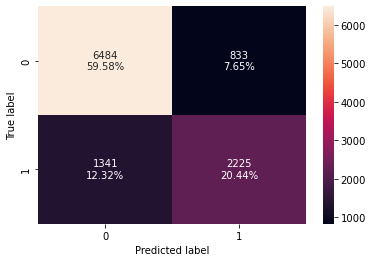

<IPython.core.display.Javascript object>

In [668]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test)

In [669]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80024,0.62395,0.72760,0.67180


<IPython.core.display.Javascript object>

* ROC curve on test set

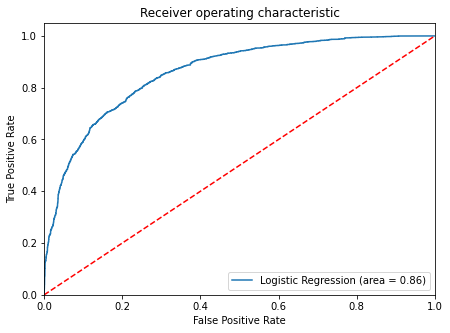

<IPython.core.display.Javascript object>

In [670]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.33799** 

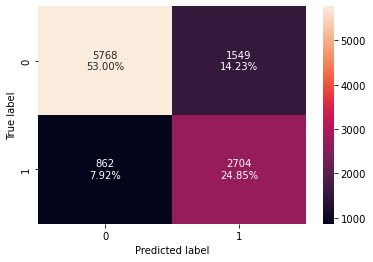

<IPython.core.display.Javascript object>

In [671]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [672]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77846,0.75827,0.63579,0.69165


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

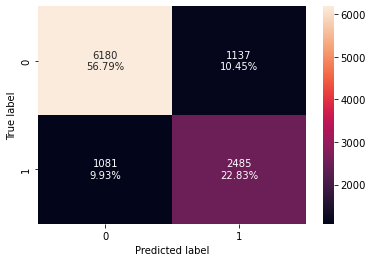

<IPython.core.display.Javascript object>

In [673]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=optimal_threshold_curve)

In [674]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79620,0.69686,0.68609,0.69143


<IPython.core.display.Javascript object>

### Model performance summary

In [675]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3397 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3397 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80659,0.78529,0.80033
Recall,0.63409,0.76103,0.69564
Precision,0.73859,0.64635,0.69514
F1,0.68236,0.69902,0.69539


<IPython.core.display.Javascript object>

In [676]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.3397 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.3397 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80024,0.77846,0.79620
Recall,0.62395,0.75827,0.69686
Precision,0.72760,0.63579,0.68609
F1,0.67180,0.69165,0.69143


<IPython.core.display.Javascript object>

* Logistic Regression is giving a generalized performance on training and test set with an f1_score of 0.69.

### Conclusion From  Logistic Regression (with statsmodels library)
* We have been able to build a predictive model that can be used by INNHotels authority to find booking status will be cancelled with an `f1_score of 0.69` on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and testing set.

* Coefficient of `no_of_weekend_nights,lead_time,arrival_year,avg_price_per_room,type_of_meal_plan_Meal Plan 2, and type_of_meal_plan_Not Selected` are `positive`, an increase in these will lead to increase in chances of customer booking cancellation. 

* Coefficient of `required_car_parking_space,arrival_month,repeated_guest,no_of_special_requests,room_type_reserved_Room_Type 2,
room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,
market_segment_type_Corporate, and market_segment_type_Offline` are negative,an increase in these will lead to decrease in chances of a guest booking cancellation.

### Building a Decision Tree model

#### Data Preparation

In [677]:
# We are defining dependent and independent variables, here X1 is independent and Y1 is dependent variable which is booking_status
X1 = data.drop(["booking_status"], axis=1)
Y1 = data["booking_status"]


<IPython.core.display.Javascript object>

In [678]:
# creating dummies for X
X1 = pd.get_dummies(X1, drop_first=True)

<IPython.core.display.Javascript object>

#### Split data

In [679]:
# spliting the data into train test in the ratio 70:30 with random_state = 1(with random_state, i define every time i take same sample for understanding the performance of model)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, Y1, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [680]:
# shape of the the training and testing data
print(f'Training data has {X1_train.shape[0]} rows and {X1_train.shape[1]} columns, and Testing data has {X1_test.shape[0]} rows and  {X1_test.shape[1]} columns')


Training data has 25392 rows and 27 columns, and Testing data has 10883 rows and  27 columns


<IPython.core.display.Javascript object>

In [681]:
print(f"Number of rows in train data: {X1_train.shape[0]}")
print(f"Number of rows in test data: {X1_test.shape[0]}")

Number of rows in train data: 25392
Number of rows in test data: 10883


<IPython.core.display.Javascript object>

In [682]:
print("Percentage of classes in training set:")
print(y1_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y1_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### `Model evaluation criterion`

#### `Model can make wrong predictions as`:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### `Which case is more important?` 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 

#### `How to reduce the losses`?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [683]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [684]:
# Defining function to create confusion matrix for training and testing data
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Building Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.33,1:0.67} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [685]:
# we are building model using DecisionTreeClassifier and using gini criteria to split
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, random_state=1
)

<IPython.core.display.Javascript object>

In [686]:
## fitting decision tree on train data
model.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

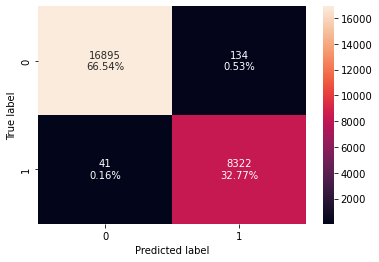

<IPython.core.display.Javascript object>

In [687]:
confusion_matrix_sklearn(model, X1_train, y1_train)

In [688]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X1_train, y1_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


<IPython.core.display.Javascript object>

* Model is able to classify almost all the data points on the training set.
* Few errors on the training set, almost each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on testing set

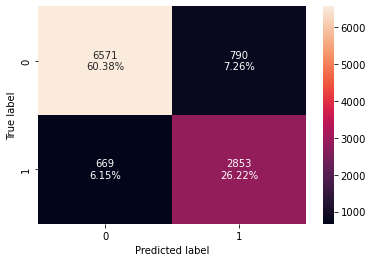

<IPython.core.display.Javascript object>

In [689]:
confusion_matrix_sklearn(model, X1_test, y1_test)

In [690]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X1_test, y1_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86594,0.81005,0.78315,0.79637


<IPython.core.display.Javascript object>

* Model is performing well on the testing dataset.
* However, we will try to prune the decision tree if we can improve the performance on testing set.

#### Visualizing the Decision Tree

In [691]:
# creating a list of column names
feature_names = list(X1.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

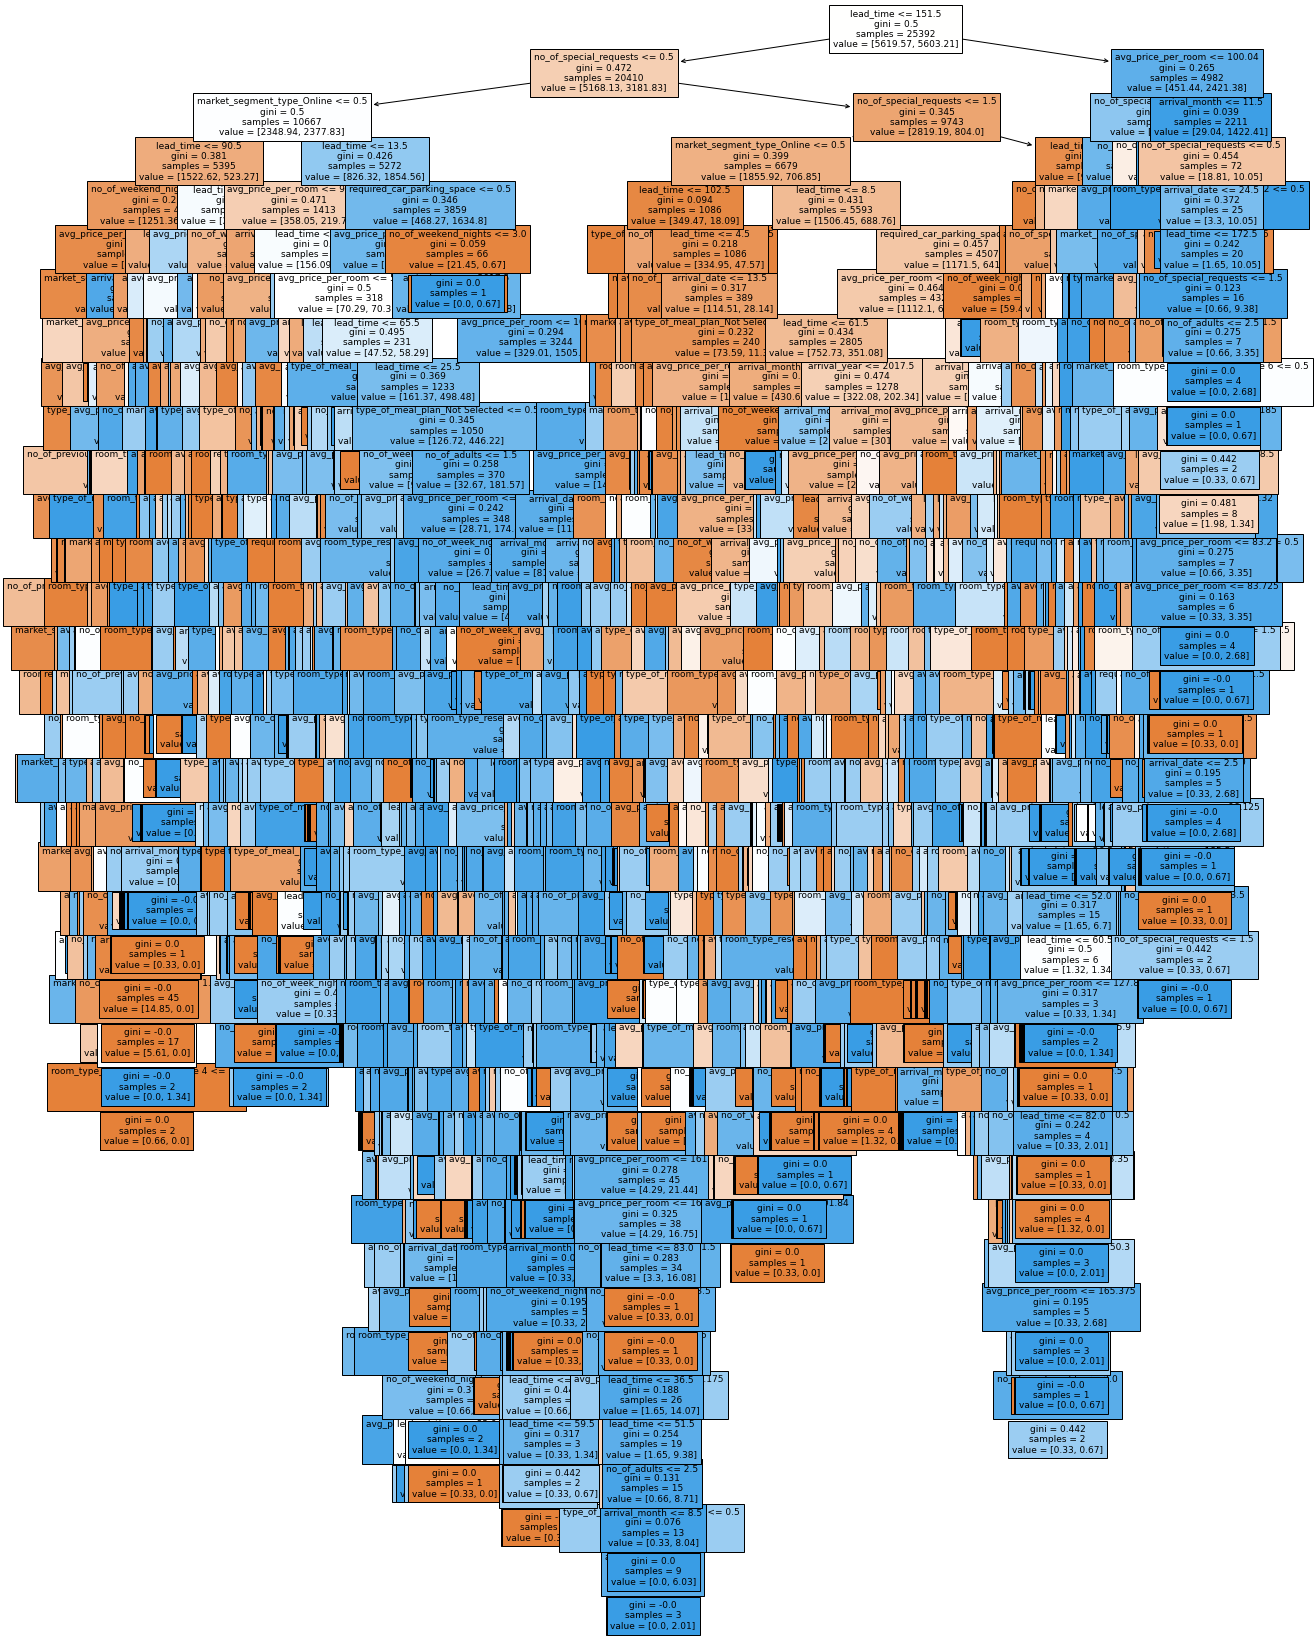

<IPython.core.display.Javascript object>

In [692]:
# Plotting a decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [693]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [20.79, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [35.97, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room 

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [694]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35429
avg_price_per_room                   0.14502
market_segment_type_Online           0.09635
no_of_special_requests               0.08646
arrival_date                         0.08259
arrival_month                        0.06634
no_of_week_nights                    0.04712
no_of_weekend_nights                 0.03577
no_of_adults                         0.02477
arrival_year                         0.01566
market_segment_type_Offline          0.00850
type_of_meal_plan_Not Selected       0.00844
required_car_parking_space           0.00756
room_type_reserved_Room_Type 4       0.00494
no_of_children                       0.00434
room_type_reserved_Room_Type 2       0.00328
type_of_meal_plan_Meal Plan 2        0.00299
room_type_reserved_Room_Type 6       0.00133
no_of_previous_bookings_not_canceled 0.00127
market_segment_type_Corporate        0.00116
room_type_reserved_Room_Type 5       0.00114
repeated_g

<IPython.core.display.Javascript object>

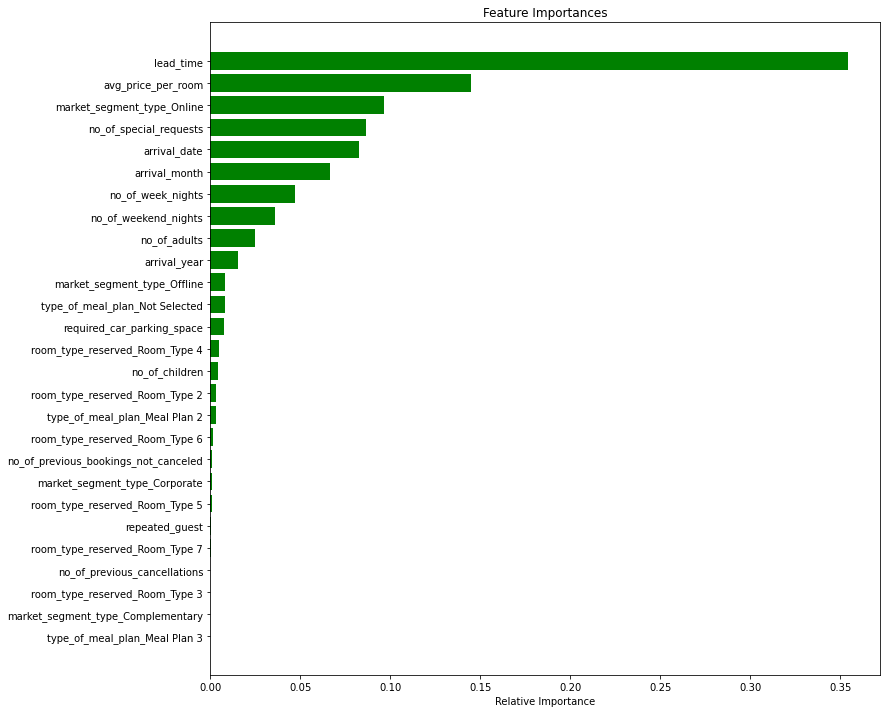

<IPython.core.display.Javascript object>

In [695]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead_time is the most important variable for predicting booking cancellation.

**The tree above is very complex, such a tree often overfits.**

### Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try few techniques to reduce over fitting.such as Pre-Pruning using max_depth 3,Pre-Pruning using Hyperparameter tuning, and Post-Pruning.

#### Pre-pruning Decision tree with depth restricted to 3

In [696]:
model1 = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, max_depth=3, random_state=1
)
model1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=3,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Confusion Matrix - decision tree with depth restricted to 3

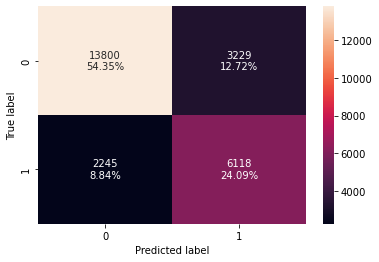

<IPython.core.display.Javascript object>

In [697]:
confusion_matrix_sklearn(model1, X1_train, y1_train)

In [698]:
# Performance on train data
decision_tree_perf_restr_train = model_performance_classification_sklearn(
    model1, X1_train, y1_train
)
decision_tree_perf_restr_train

,Accuracy,Recall,Precision,F1
0,0.78442,0.73156,0.65454,0.69091


<IPython.core.display.Javascript object>

In [699]:
# Performance on test data
decision_tree_perf_restr_test = model_performance_classification_sklearn(
    model1, X1_test, y1_test
)
decision_tree_perf_restr_test

,Accuracy,Recall,Precision,F1
0,0.79133,0.73850,0.65831,0.69611


<IPython.core.display.Javascript object>

* Accuracy, Recall, Precision and F1 all has decreased on the train data but we got a generalized model.
* Model is not overfitting.
* However, we will try usingGridSearch for Hyperparameter tuning of our tree model 

#### Pre-Pruning_Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [700]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "max_leaf_nodes": [5, 10, 20, 30, 50, 75, 150, 250],
    "min_samples_split": [5, 7, 10, 15, 20, 30, 50, 70],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X1_train, y1_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=9,
                       max_leaf_nodes=250, min_impurity_decrease=0.0001,
                       min_samples_split=5, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

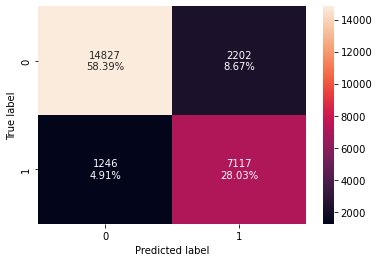

<IPython.core.display.Javascript object>

In [701]:
confusion_matrix_sklearn(estimator, X1_train, y1_train)

In [702]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X1_train, y1_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.86421,0.85101,0.76371,0.80500


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

#### Checking performance on testing set

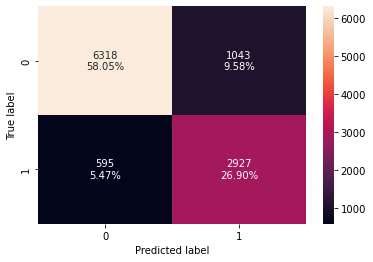

<IPython.core.display.Javascript object>

In [703]:
confusion_matrix_sklearn(estimator, X1_test, y1_test)

In [704]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X1_test, y1_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84949,0.83106,0.73728,0.78137


<IPython.core.display.Javascript object>

* After tuning hyperparameters, the performance of the model has become more generalised.

#### Visualizing the Decision Tree

In [705]:
feature_names = list(X1.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

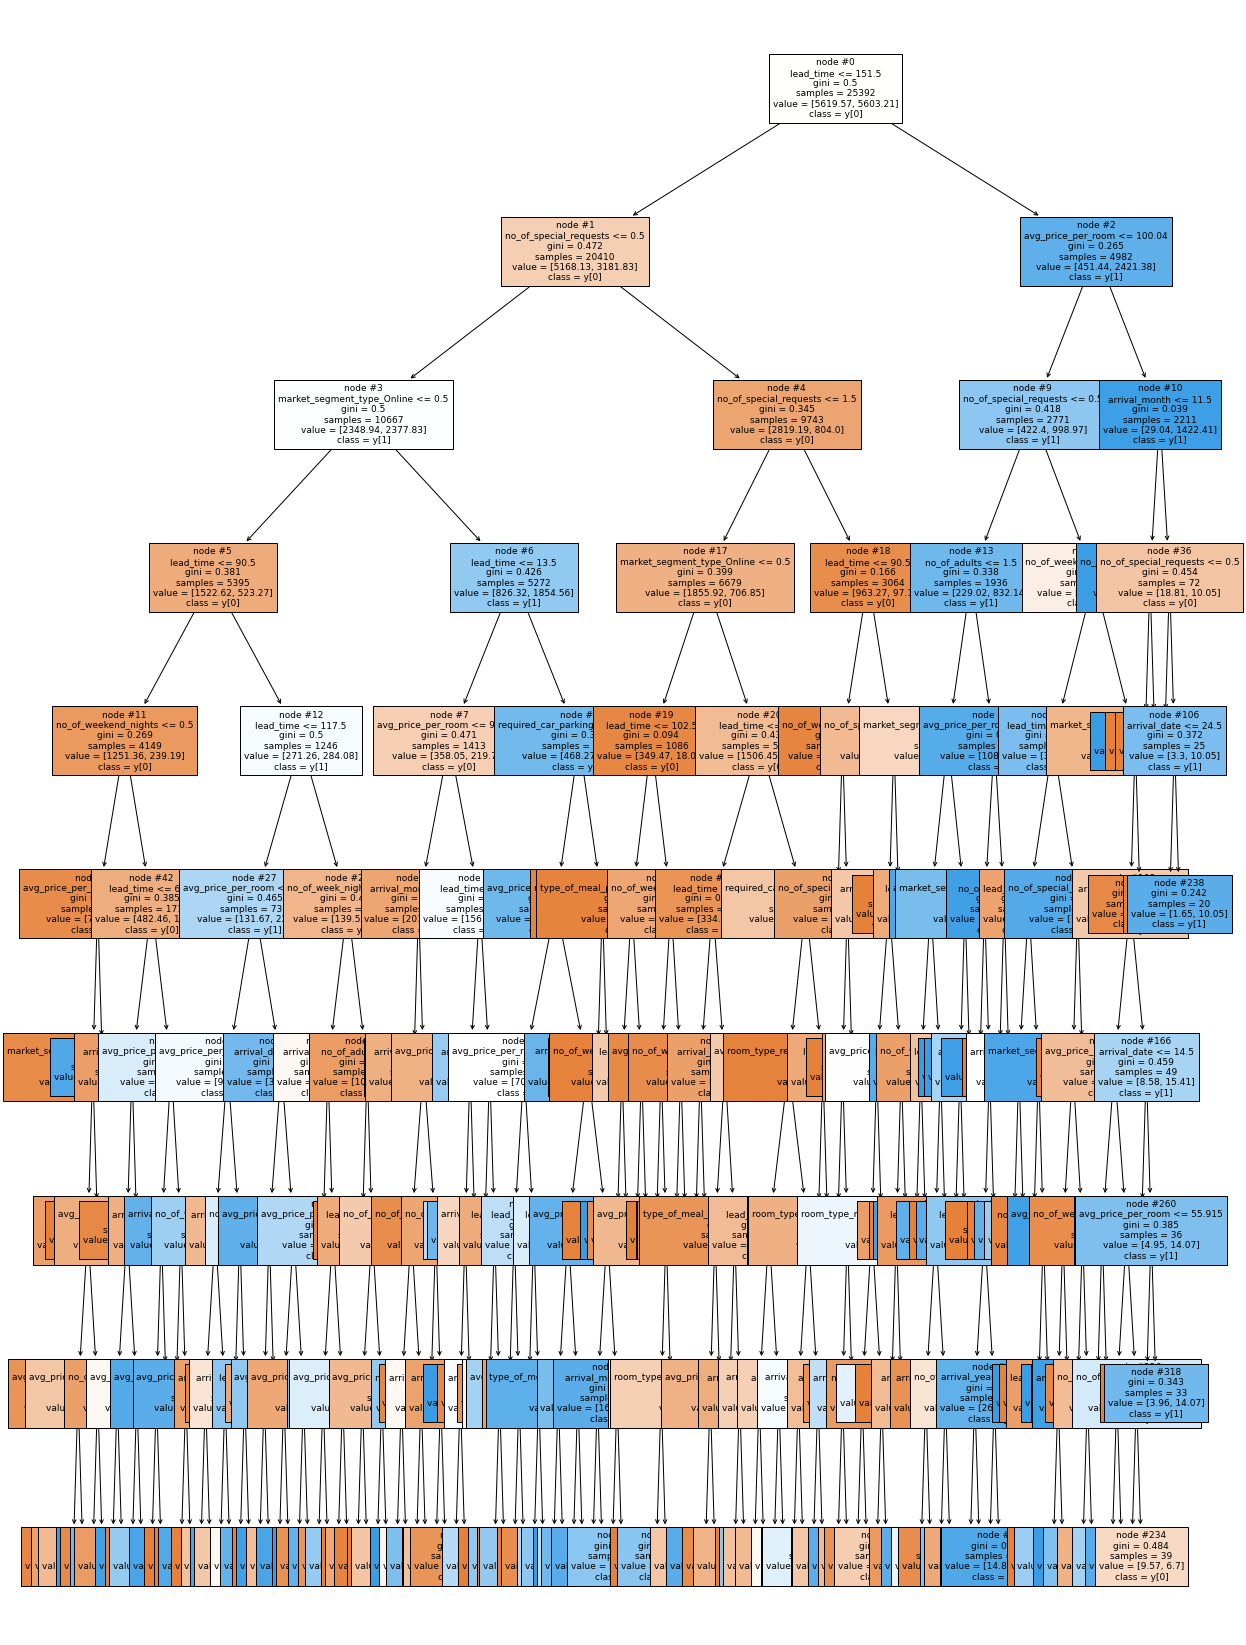

<IPython.core.display.Javascript object>

In [706]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [707]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [91.74, 4.69] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- weights: [92.40, 24.12] class: 0
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [53.46, 24.12] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.36] class: 1
|   |   |   |   |   |  

<IPython.core.display.Javascript object>

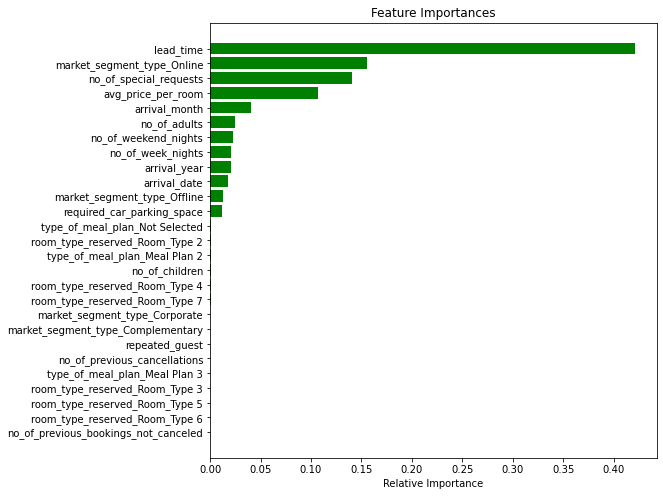

<IPython.core.display.Javascript object>

In [708]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

#### Total impurity of leaves vs effective alphas of pruned tree
----------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [709]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})
path = clf.cost_complexity_pruning_path(X1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [710]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1676,0.00889,0.32800
1677,0.00983,0.33783
1678,0.01273,0.35056
1679,0.03410,0.41877


<IPython.core.display.Javascript object>

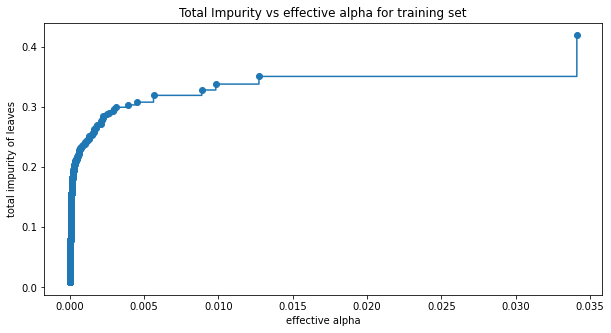

<IPython.core.display.Javascript object>

In [711]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [712]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.33, 1: 0.67}
    )
    clf.fit(X1_train, y1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08123211203866193


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

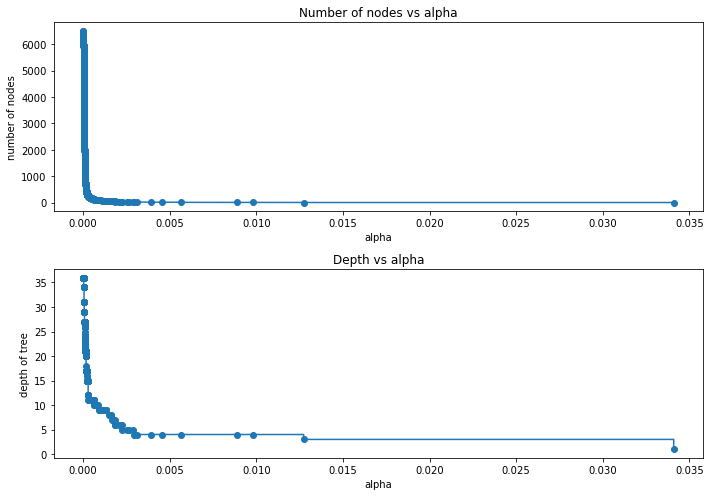

<IPython.core.display.Javascript object>

In [713]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


#### F1 Score vs alpha for training and testing sets

In [714]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X1_train)
    values_train = f1_score(y1_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X1_test)
    values_test = f1_score(y1_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

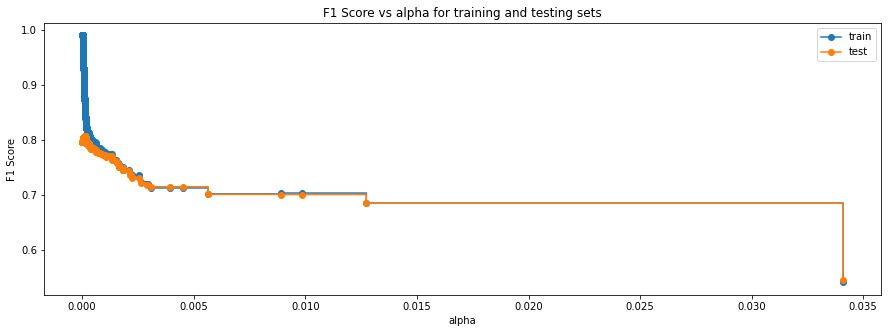

<IPython.core.display.Javascript object>

In [715]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [716]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012278835350770854,
                       class_weight={0: 0.33, 1: 0.67}, random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

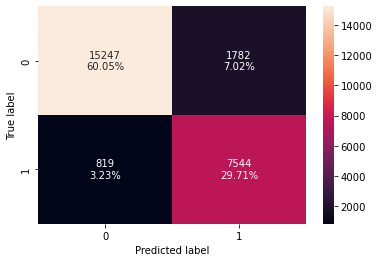

<IPython.core.display.Javascript object>

In [717]:
confusion_matrix_sklearn(best_model, X1_train, y1_train)

In [718]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X1_train, y1_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89757,0.90207,0.80892,0.85296


<IPython.core.display.Javascript object>

#### Checking performance on test set

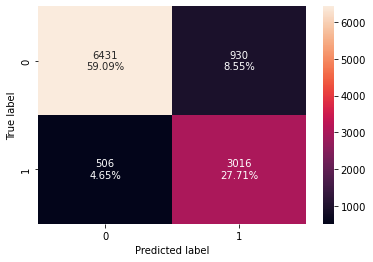

<IPython.core.display.Javascript object>

In [719]:
# code to create confusion matrix for test data on best model
confusion_matrix_sklearn(best_model, X1_test, y1_test)

In [720]:
## Code to check performance of test set on best model
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X1_test, y1_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86805,0.85633,0.76432,0.80771


<IPython.core.display.Javascript object>

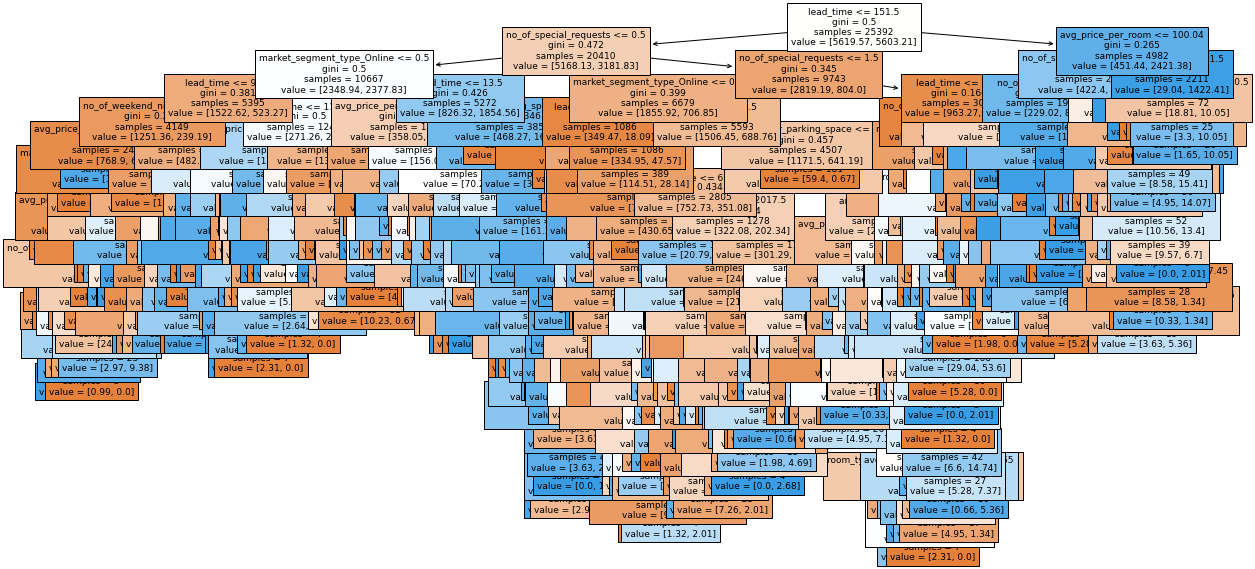

<IPython.core.display.Javascript object>

In [721]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [722]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [91.74, 4.69] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |  

<IPython.core.display.Javascript object>

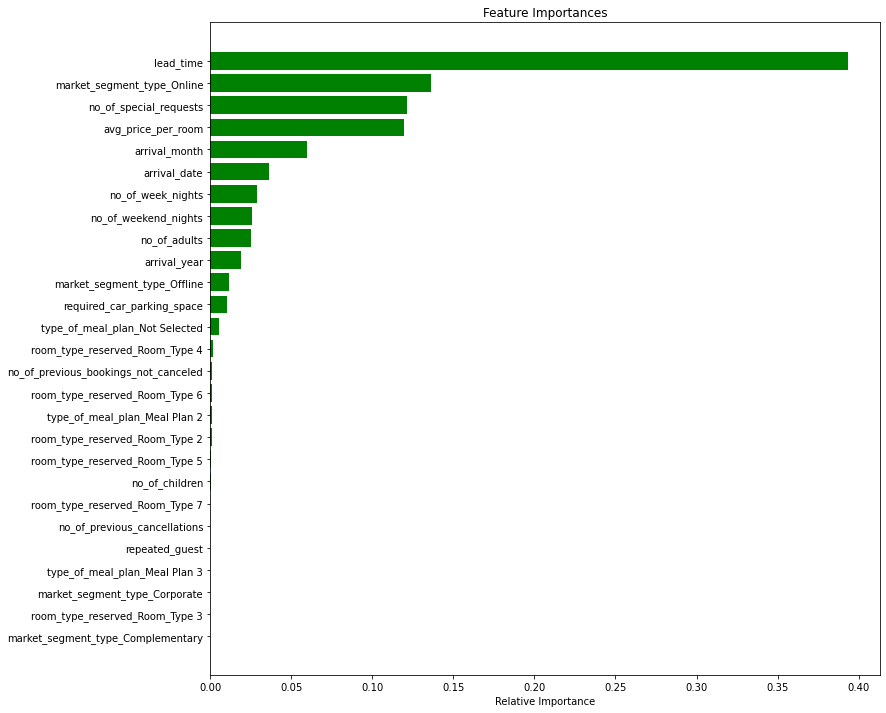

<IPython.core.display.Javascript object>

In [723]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Model Performance Comparison and Conclusions

In [724]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_restr_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning using max_depth-3)",
    "Decision Tree (Pre-Pruning using Hyperparameter tuning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning using max_depth-3),Decision Tree (Pre-Pruning using Hyperparameter tuning),Decision Tree (Post-Pruning)
Accuracy,0.99311,0.78442,0.86421,0.89757
Recall,0.99510,0.73156,0.85101,0.90207
Precision,0.98415,0.65454,0.76371,0.80892
F1,0.98960,0.69091,0.80500,0.85296


<IPython.core.display.Javascript object>

In [725]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_perf_restr_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning using max_depth-3)",
    "Decision Tree (Pre-Pruning using Hyperparameter tuning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning using max_depth-3),Decision Tree (Pre-Pruning using Hyperparameter tuning),Decision Tree (Post-Pruning)
Accuracy,0.86594,0.79133,0.84949,0.86805
Recall,0.81005,0.73850,0.83106,0.85633
Precision,0.78315,0.65831,0.73728,0.76432
F1,0.79637,0.69611,0.78137,0.80771


<IPython.core.display.Javascript object>

**Decision tree with post-pruning is giving the highest Accuracy,Recall,Precision and F1 on test set.**

### `Conclusions From Decision Tree`
- We analyzed the booking_status using different techniques and used Decision Tree Classifier to build a predictive model with `F1 score 0.8077`.
- The model built can be used to predict if a customer is going to cancel the booking or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.

- `lead_time,market_segment_type_online,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,no_of_week_nights,no_of_weekend_nights,no_of_adults and arrival_year` are the most important variable in predicting the booking status that if a customer is going to cancel a booking or not. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.


### `Conclusions From  Logistic Regression (with statsmodels library)`
* We have been able to build a predictive model that can be used by INNHotels authority to find booking status will be cancelled with an `f1_score of 0.69` on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and testing set.

* Coefficient of `no_of_weekend_nights`,`lead_time`,`arrival_year`,`avg_price_per_room`,`type_of_meal_plan_Meal Plan 2`, and `type_of_meal_plan_Not Selected` are positive, an increase in these will lead to increase in chances of customer booking cancellation. 

* Coefficient of `required_car_parking_space`,`arrival_month`,`repeated_guest`,`no_of_special_requests`,`room_type_reserved_Room_Type 2`,
`room_type_reserved_Room_Type 4`,`room_type_reserved_Room_Type 5`,`room_type_reserved_Room_Type 6`,`room_type_reserved_Room_Type 7`,
`market_segment_type_Corporate`, and `market_segment_type_Offline` are negative,an increase in these will lead to decrease in chances of a guest booking cancellation.

### `Few Interpretations From the decision tree and Logistic regression Model`

* **`According to the decision tree model-`**  

    a) If a customer booking lead_time > 151.50 and average_price_per_room > 100.04 and arrival_month <= 11.50(means before nov 16) and the no_of_special_requests > 2.50 then customer is not going to cancel their booking.

    b) If a customer booking lead_time <= 151.50 and no_of_special_requests >  0.50 and  no_of_weekend_nights > 0.50 and market_segment_type_Offline >  0.50 no_of_week_nights <= 5.50,lead_time <= 284.25 and arrival_date <= 30.00
 then customer is not going to cancel their bookings.
    
    
* **`According to the logistic regression model-`** 

    a)`required_car_parking_space`: Holding all other features constant a 1 unit change in the required_car_parking_space will decrease the odds of a a guest booking cancellation by  0.19 times or a decrease of 80.66% decrease in odds of a guest booking cancellation.
    
    b)`repeated_guest`: The odds of a guest booking who are `repeated_guest` having a booking cancellation chance is `0.057` less or `94.24% decrease` than the guest who never visited the hotel.
    
    c)`no_of_special_requests`: Holding all other features constant a 1 unit change in the number_of_special_requests will decrease the odds of a a guest booking cancellation by  0.22582 times or a decrease of 77.41% decrease in odds of a guest booking cancellation.
    
    d)`no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a guest booking cancellation by 1.17 times or a 17.08% increase in odds of a guest booking cancellation.
        
    e) `room_type_reserved_Room_Type 2`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 2 will decrease the odds of a a guest booking cancellation by  0.7072 times or a decrease of 29.27% decrease in odds of a guest booking cancellation.
        
    f)`room_type_reserved_Room_Type 4`: Holding all other features constant a 1 unit change in the room_type_reserved_Room_Type 4 will decrease the odds of a a guest booking cancellation by  0.75 times or a decrease of 24.09% decrease in odds of a guest booking cancellation.


### Actionable Insights and Recommendations


* It is observed that busiest months of the hotel are Aug to Oct,where Oct is the most busiest month.so, INN hotel can impose free cancellation restrictions on those months.

* It is observed that most of customer bookings cancel from Jul to Oct where in jul it is the top most.so, during this time period INN hotel can impose a policy to make more legitimate like no free cancellation, charge a particular amount basing on the time window.Additionally, a little time window can be provided for free cancellation of the bookings.

* It was observed that If the total days(weekend + week days) is 18,22 and 24 days then  then all booking was cancelled.again,If the  total days(weekend + week days) are more than 10 days then the chance of cancellation is more than `65%`.so INN hotel can adopt must charging policy for booking confirmation if any booking belongs to more than 10 nights.


* It is observed that `36.5%`of cancelled bookings belongs to online market segment followed by offline `~30%`, aviation `~30%` and corporate `~10%`.so, INN hotel can adopt policy so that online and offline bookings have timeframe for free cancellation but after the timeframe charge an amount if customer tries to cancel their booking.

* It is observed that No complementary booking was cancelled. so it is certain that if a customer booking belongs to complementary then customer is showing up in the hotel. In this case INN hotels can provide complementary benefits to only loyal members.

* It is observed that If if any bookings has the family members(adults + children) is more than 11 then booking was cancelled.so, in this case to make it legitimate booking customer should charge for booking confirmation if any booking has familiy members greater than 10.so,INN hotel can impose charge for cancellation if any booking has more than 10 family members.

* It is observed that If the booking time and arrival of hotel time is within 100 days then booking will not be cancelled otherwise it will mostly be cancelled.so,INN hotel can adopt if the customer booking is more than 90 days(3 months) then there will be free cancellation otherwise it will charge for cancellation.

* It is observed that Only `2.6%` customer bookings are from repeated guest.so INN hotel can adopt Customer retention by Member Loyalty programs initiatives like special discounts, coupons, etc.

* It is observed that Many guests special requirements when booking a hotel room and if the number of special requests is more than 2 than it is certain that booking will not be canceled.so,INN hotel can give promotion offer to these bookings to make them loyal member.

* It is observed that `~93%` of customer bookings dont have children meaning they are couple.so INN hotels can establish few facilities like children park, gaming for kids, children amusement and advertise to entice more family with children.

* It is observed that `77.5%` of customer booking have chosen `Room_Type 1` followed by `16.7%` have chosen  `Room_Type 4` while the demand of other rooms are very less. so those rooms can go unsold which will incur loss for hotels. so, INN hotels might adopt different promotional offer to other rooms that goes unsold or less demanding. 

* It is observed that `76.7%` of customer booking have chosen `Meal Plan 1` which is only breakfast follwed by `14.1%`selected `Not selected meal plan` and `9.1%` Selected `Meal Plan 2(breakfast + lunch/dinner)`.In this case INN hotel can adopt complementary breakfast which will cover almost `~77%`of customer bookings and special discount for guest in lunch or dinner. This will entice more booking to the customers.

* It is observed that Average room price is highest in `online` market segment followed by `aviation` and `offline`.so, in this case INN hotels can segment the price for members and non members while booking in online. members should get discounted price on any market segment like `online or offline`.

* Since, `64%` of the guest are coming from `Online` market segments.so,Additionally INN hotel might adopt following measures:

    a) Better resource management - Regular days (Non-weekend) days is when the website sees the most traffic, resources such as customer care services can be allocated more for these days.
    
    b) Websites of INN hotels should be made more friendly, easily accessible, and feasible for other operating systems and browsers and responsive to all devices like phone,tablet or pc.
        
    c) INN hotels can provide faster complemantary car parking or wifi facility to entice more customer bookings.
